In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.utils import resample


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.cluster import KMeans


from sklearn.metrics import classification_report, roc_curve, precision_recall_curve, auc,  recall_score, accuracy_score, precision_score, confusion_matrix,average_precision_score,f1_score,roc_auc_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score




# Data Dictionary
1. **Report Number**: Unique identifier for the crash report.
2. **Local Case Number**: Local case identifier for the crash report.
3. **Agency Name**: Name of the agency reporting the crash.
4. **ACRS Report Type**: Type of report generated by the Automated Crash Reporting System.
5. **Crash Date/Time**: Date and time when the crash occurred.
6. **Route Type**: Type of route where the crash occurred (e.g., highway, local road).
7. **Road Name**: Name of the road where the crash occurred.
8. **Cross-Street Type**: Type of the intersecting street.
9. **Cross-Street Name**: Name of the intersecting street.
10. **Off-Road Description**: Description of the location if the crash occurred off-road.
11. **Municipality**: Municipality where the crash occurred.
12. **Related Non-Motorist**: Information about non-motorists involved in the crash.
13. **Collision Type**: Type of collision (e.g., rear-end, head-on).
14. **Weather**: Weather conditions at the time of the crash.
15. **Surface Condition**: Road surface conditions at the time of the crash.
16. **Light**: Lighting conditions at the time of the crash.
17. **Traffic Control**: Type of traffic control at the crash location (e.g., traffic signal, stop sign).
18. **Driver Substance Abuse**: Information about substance abuse by the driver.
19. **Non-Motorist Substance Abuse**: Information about substance abuse by non-motorists involved.
20. **Person ID**: Unique identifier for individuals involved in the crash.
21. **Driver At Fault**: Indicates whether the driver was at fault.
22. **Injury Severity**: Severity of injuries sustained in the crash.
23. **Circumstance**: Circumstances surrounding the crash.
24. **Driver Distracted By**: Factors distracting the driver at the time of the crash.
25. **Drivers License State**: State where the driver's license was issued.
26. **Vehicle ID**: Unique identifier for vehicles involved in the crash.
27. **Vehicle Damage Extent**: Extent of damage to the vehicle.
28. **Vehicle First Impact Location**: Location on the vehicle where the first impact occurred.
29. **Vehicle Second Impact Location**: Location on the vehicle where the second impact occurred (if applicable).
30. **Vehicle Body Type**: Type of vehicle body (e.g., sedan, SUV).
31. **Vehicle Movement**: Movement of the vehicle at the time of the crash.
32. **Vehicle Continuing Dir**: Direction in which the vehicle was continuing after the crash.
33. **Vehicle Going Dir**: Direction in which the vehicle was going at the time of the crash.
34. **Speed Limit**: Posted speed limit at the crash location.
35. **Driverless Vehicle**: Indicates whether the vehicle was driverless (self-driving).
36. **Parked Vehicle**: Indicates whether the vehicle was parked at the time of the crash.
37. **Vehicle Year**: Year of manufacture of the vehicle.
38. **Vehicle Make**: Make or manufacturer of the vehicle.
39. **Vehicle Model**: Model of the vehicle.
40. **Equipment Problems**: Any equipment problems reported for the vehicle.
41. **Latitude**: Latitude coordinates of the crash location.
42. **Longitude**: Longitude coordinates of the crash location.
43. **Location**: Description or address of the crash location.


In [6]:
df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
df.sample(10)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/819995466.py:1: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/819995466.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df=pd.read_csv('/Users/Abdul/Desktop/MMA/Data Mining/Crash_Reporting_-_Drivers_Data.csv',parse_dates=['Crash Date/Time'])


,Report Number,Local Case Number,Agency Name,ACRS Report Type,Crash Date/Time,Route Type,Road Name,Cross-Street Type,Cross-Street Name,Off-Road Description,...,Speed Limit,Driverless Vehicle,Parked Vehicle,Vehicle Year,Vehicle Make,Vehicle Model,Equipment Problems,Latitude,Longitude,Location
3511,MCP24370055,230056305,Montgomery County Police,Property Damage Crash,2023-09-22 13:40:00,NaN,NaN,NaN,NaN,PARKING LOT OF 13850 TRAVILAH RD,...,0,No,Yes,2017,FORD,E-450,NO MISUSE,39.083462,-77.232188,"(39.08346183, -77.23218783)"
74411,MCP2752002F,180027903,Montgomery County Police,Property Damage Crash,2018-06-06 15:30:00,County,CROMWELL DR,County,WILTSHIRE DR,NaN,...,25,No,No,2016,HYUN,4S,NaN,38.967012,-77.117643,"(38.96701167, -77.11764333)"
122893,MCP2198003M,170550783,Montgomery County Police,Property Damage Crash,2017-12-26 18:06:00,County,SAM EIG HWY,Ramp,RAMP 1 FR IS 270 NB TO IS 370 WB,NaN,...,55,No,No,2017,GMC,PICK-UP,UNKNOWN,39.120058,-77.201842,"(39.12005833, -77.20184167)"
54510,MCP2512001T,16014899,MONTGOMERY,Injury Crash,2016-03-26 16:40:00,Municipality,KENTLANDS BLVD,Maryland (State),GREAT SENECA HWY,NaN,...,25,No,No,2009,HONDA,CIVIC,NO MISUSE,39.123433,-77.232393,"(39.12343333, -77.23239333)"
42011,MCP242500DY,190025916,Montgomery County Police,Property Damage Crash,2019-05-31 08:31:00,Maryland (State),COLESVILLE RD,County,SECOND AVE,NaN,...,30,No,No,2015,NISSAN,ALTIMA,NO MISUSE,38.995048,-77.029830,"(38.99504833, -77.02983)"
36014,MCP29160022,180012281,Montgomery County Police,Property Damage Crash,2018-03-11 13:30:00,County,FEATHERWOOD ST,County,OLD COLUMBIA PIKE,NaN,...,15,No,No,2013,NISSAN,ROGUE,NO MISUSE,39.059329,-76.971749,"(39.05932909, -76.97174907)"
13061,MCP3067001R,200003488,Montgomery County Police,Property Damage Crash,2020-01-21 23:00:00,Maryland (State),WOODFIELD RD,County,EMORY GROVE RD,NaN,...,35,No,No,2006,SUBARU,WRX,NO MISUSE,39.152773,-77.171755,"(39.15277333, -77.171755)"
149933,MCP30750033,210012382,Montgomery County Police,Injury Crash,2021-04-02 20:37:00,County,MIDDLEBROOK RD,Maryland (State),GERMANTOWN RD,NaN,...,40,No,No,2014,HYUN,AZERA,NaN,39.178325,-77.266437,"(39.178325, -77.26643667)"
43129,MCP31820014,200026889,Montgomery County Police,Property Damage Crash,2020-07-11 03:41:00,NaN,NaN,NaN,NaN,IN PARKINGLOT OF 9475 GEORGIA AVE SILVER SPRIN...,...,0,No,No,2011,BMW,X6,NO MISUSE,39.009905,-77.040627,"(39.009905, -77.04062667)"
101295,MCP2671002K,210008360,Montgomery County Police,Property Damage Crash,2021-03-05 15:50:00,Maryland (State),PINEY BRANCH RD,County,RITCHIE AVE,NaN,...,35,No,No,2005,DODGE,CARAVAN,NO MISUSE,38.988118,-77.012072,"(38.98811833, -77.01207167)"


In [7]:
df.columns

Index(['Report Number', 'Local Case Number', 'Agency Name', 'ACRS Report Type',
       'Crash Date/Time', 'Route Type', 'Road Name', 'Cross-Street Type',
       'Cross-Street Name', 'Off-Road Description', 'Municipality',
       'Related Non-Motorist', 'Collision Type', 'Weather',
       'Surface Condition', 'Light', 'Traffic Control',
       'Driver Substance Abuse', 'Non-Motorist Substance Abuse', 'Person ID',
       'Driver At Fault', 'Injury Severity', 'Circumstance',
       'Driver Distracted By', 'Drivers License State', 'Vehicle ID',
       'Vehicle Damage Extent', 'Vehicle First Impact Location',
       'Vehicle Second Impact Location', 'Vehicle Body Type',
       'Vehicle Movement', 'Vehicle Continuing Dir', 'Vehicle Going Dir',
       'Speed Limit', 'Driverless Vehicle', 'Parked Vehicle', 'Vehicle Year',
       'Vehicle Make', 'Vehicle Model', 'Equipment Problems', 'Latitude',
       'Longitude', 'Location'],
      dtype='object')

In [8]:
df.isna().sum()

Report Number                          0
Local Case Number                      0
Agency Name                            0
ACRS Report Type                       0
Crash Date/Time                        0
Route Type                         16424
Road Name                          15456
Cross-Street Type                  16455
Cross-Street Name                  15467
Off-Road Description              151083
Municipality                      148079
Related Non-Motorist              161260
Collision Type                       566
Weather                            12946
Surface Condition                  19513
Light                               1380
Traffic Control                    24773
Driver Substance Abuse             30345
Non-Motorist Substance Abuse      162367
Person ID                              0
Driver At Fault                        0
Injury Severity                        0
Circumstance                      136179
Driver Distracted By                   0
Drivers License 

In [9]:
# dropping identifier and location columns 
df.drop(['Report Number', 'Local Case Number', 'Person ID', 'Vehicle ID','Agency Name','Location'],axis=1,inplace=True)

In [10]:
# dropping columns with high number of missing values
cols_to_drop = ['Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse']
df = df.drop(columns=cols_to_drop)


In [11]:
df.isna().sum()

ACRS Report Type                      0
Crash Date/Time                       0
Route Type                        16424
Road Name                         15456
Cross-Street Type                 16455
Cross-Street Name                 15467
Collision Type                      566
Weather                           12946
Surface Condition                 19513
Light                              1380
Traffic Control                   24773
Driver Substance Abuse            30345
Driver At Fault                       0
Injury Severity                       0
Driver Distracted By                  0
Drivers License State              9508
Vehicle Damage Extent               302
Vehicle First Impact Location       156
Vehicle Second Impact Location      256
Vehicle Body Type                  2546
Vehicle Movement                    367
Vehicle Continuing Dir             2585
Vehicle Going Dir                  2585
Speed Limit                           0
Driverless Vehicle                    0


## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.


In [12]:
df2=df.dropna()
df2.shape


(81860, 32)

In [13]:
df2['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          64839
POSSIBLE INJURY              9731
SUSPECTED MINOR INJURY       6510
SUSPECTED SERIOUS INJURY      719
FATAL INJURY                   61
Name: count, dtype: int64

In [14]:
df['Injury Severity'].value_counts()

Injury Severity
NO APPARENT INJURY          136509
POSSIBLE INJURY              16933
SUSPECTED MINOR INJURY       11567
SUSPECTED SERIOUS INJURY      1378
FATAL INJURY                   150
Name: count, dtype: int64

In [15]:
df['ACRS Report Type'].value_counts()

ACRS Report Type
Property Damage Crash    105686
Injury Crash              60436
Fatal Crash                 415
Name: count, dtype: int64

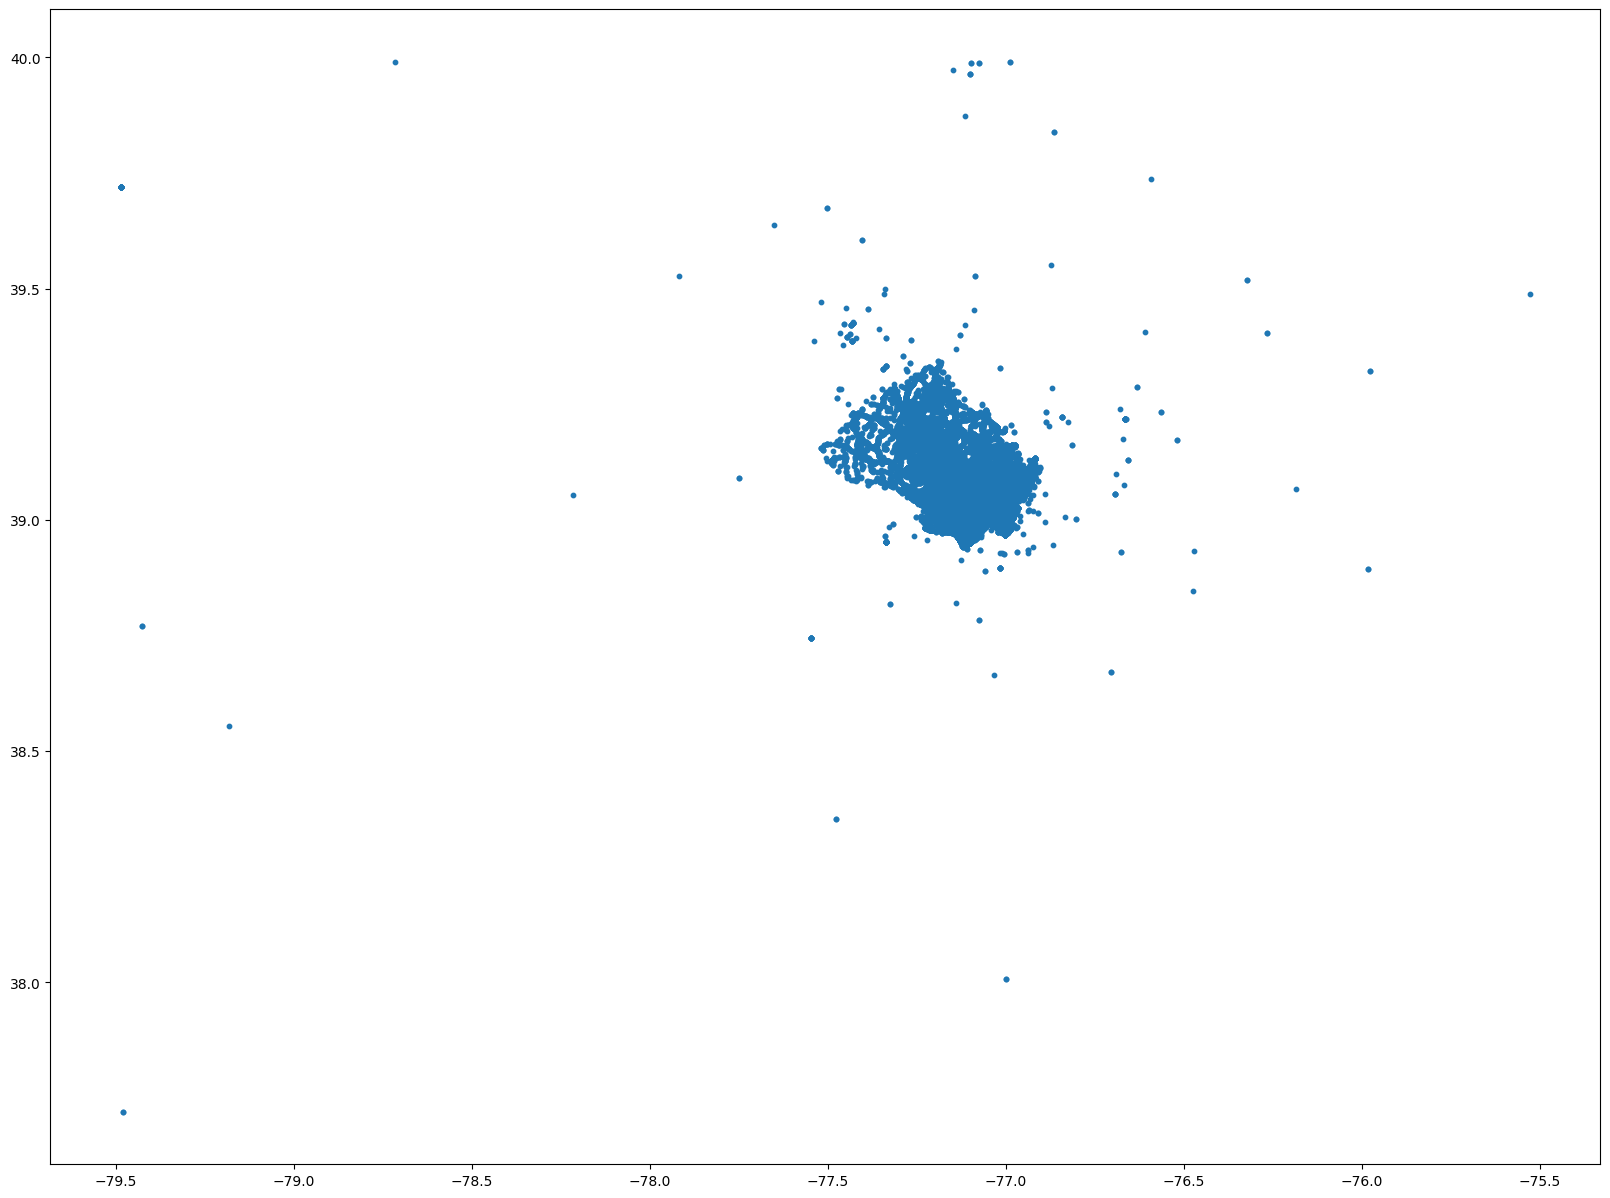

In [16]:
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10);

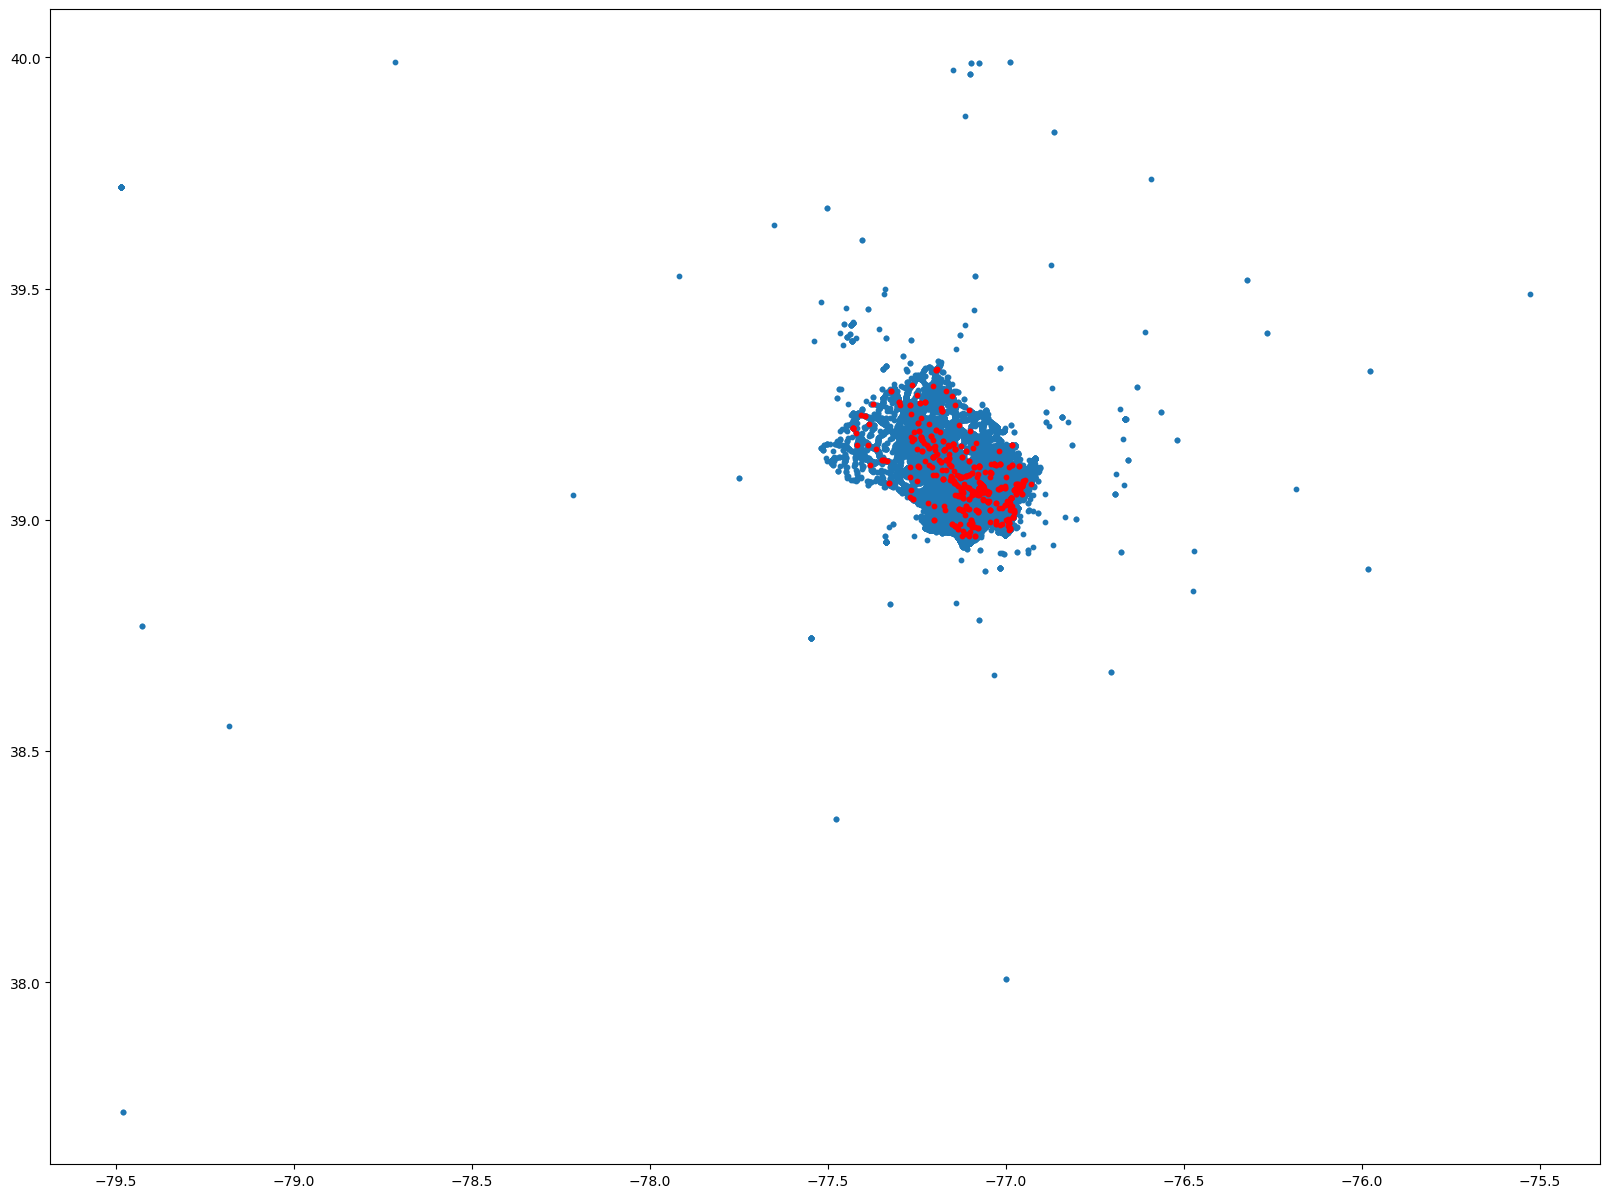

In [17]:
Fatal_Crashes=df[df['ACRS Report Type']=='Fatal Crash']
plt.figure(figsize=(20, 15))

plt.scatter (df['Longitude'],
             df['Latitude'],
             s=10)
plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


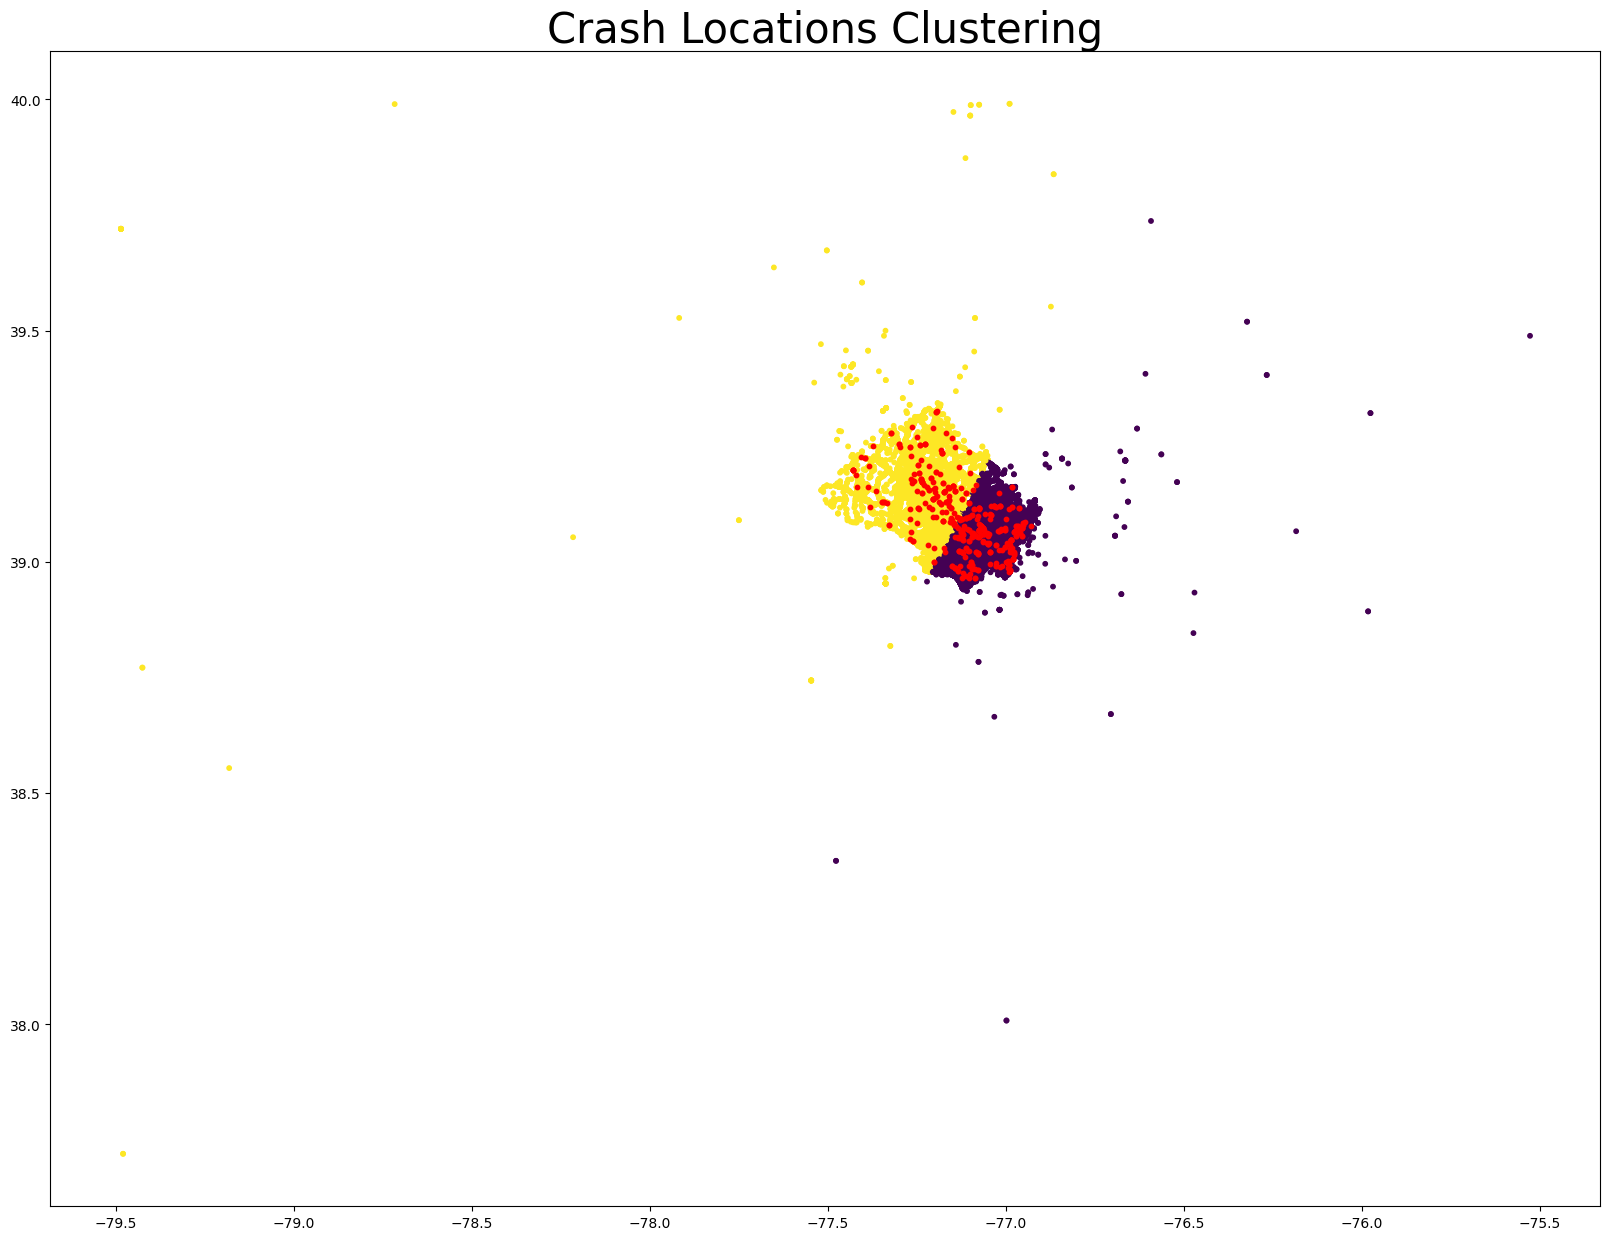

In [18]:
model=KMeans(n_clusters=2)
model.fit(df[['Longitude','Latitude']])
clusters=model.predict(df[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df['Longitude'],df['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


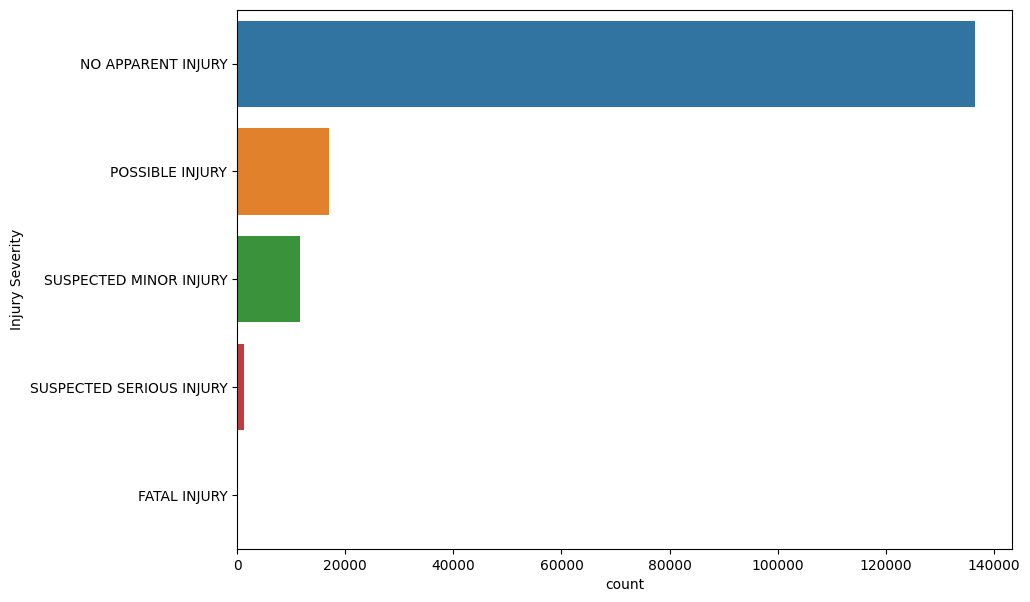

In [19]:
plt.figure(figsize=(10, 7))
sns.countplot(y='Injury Severity',data=df,order=df['Injury Severity'].value_counts().index);

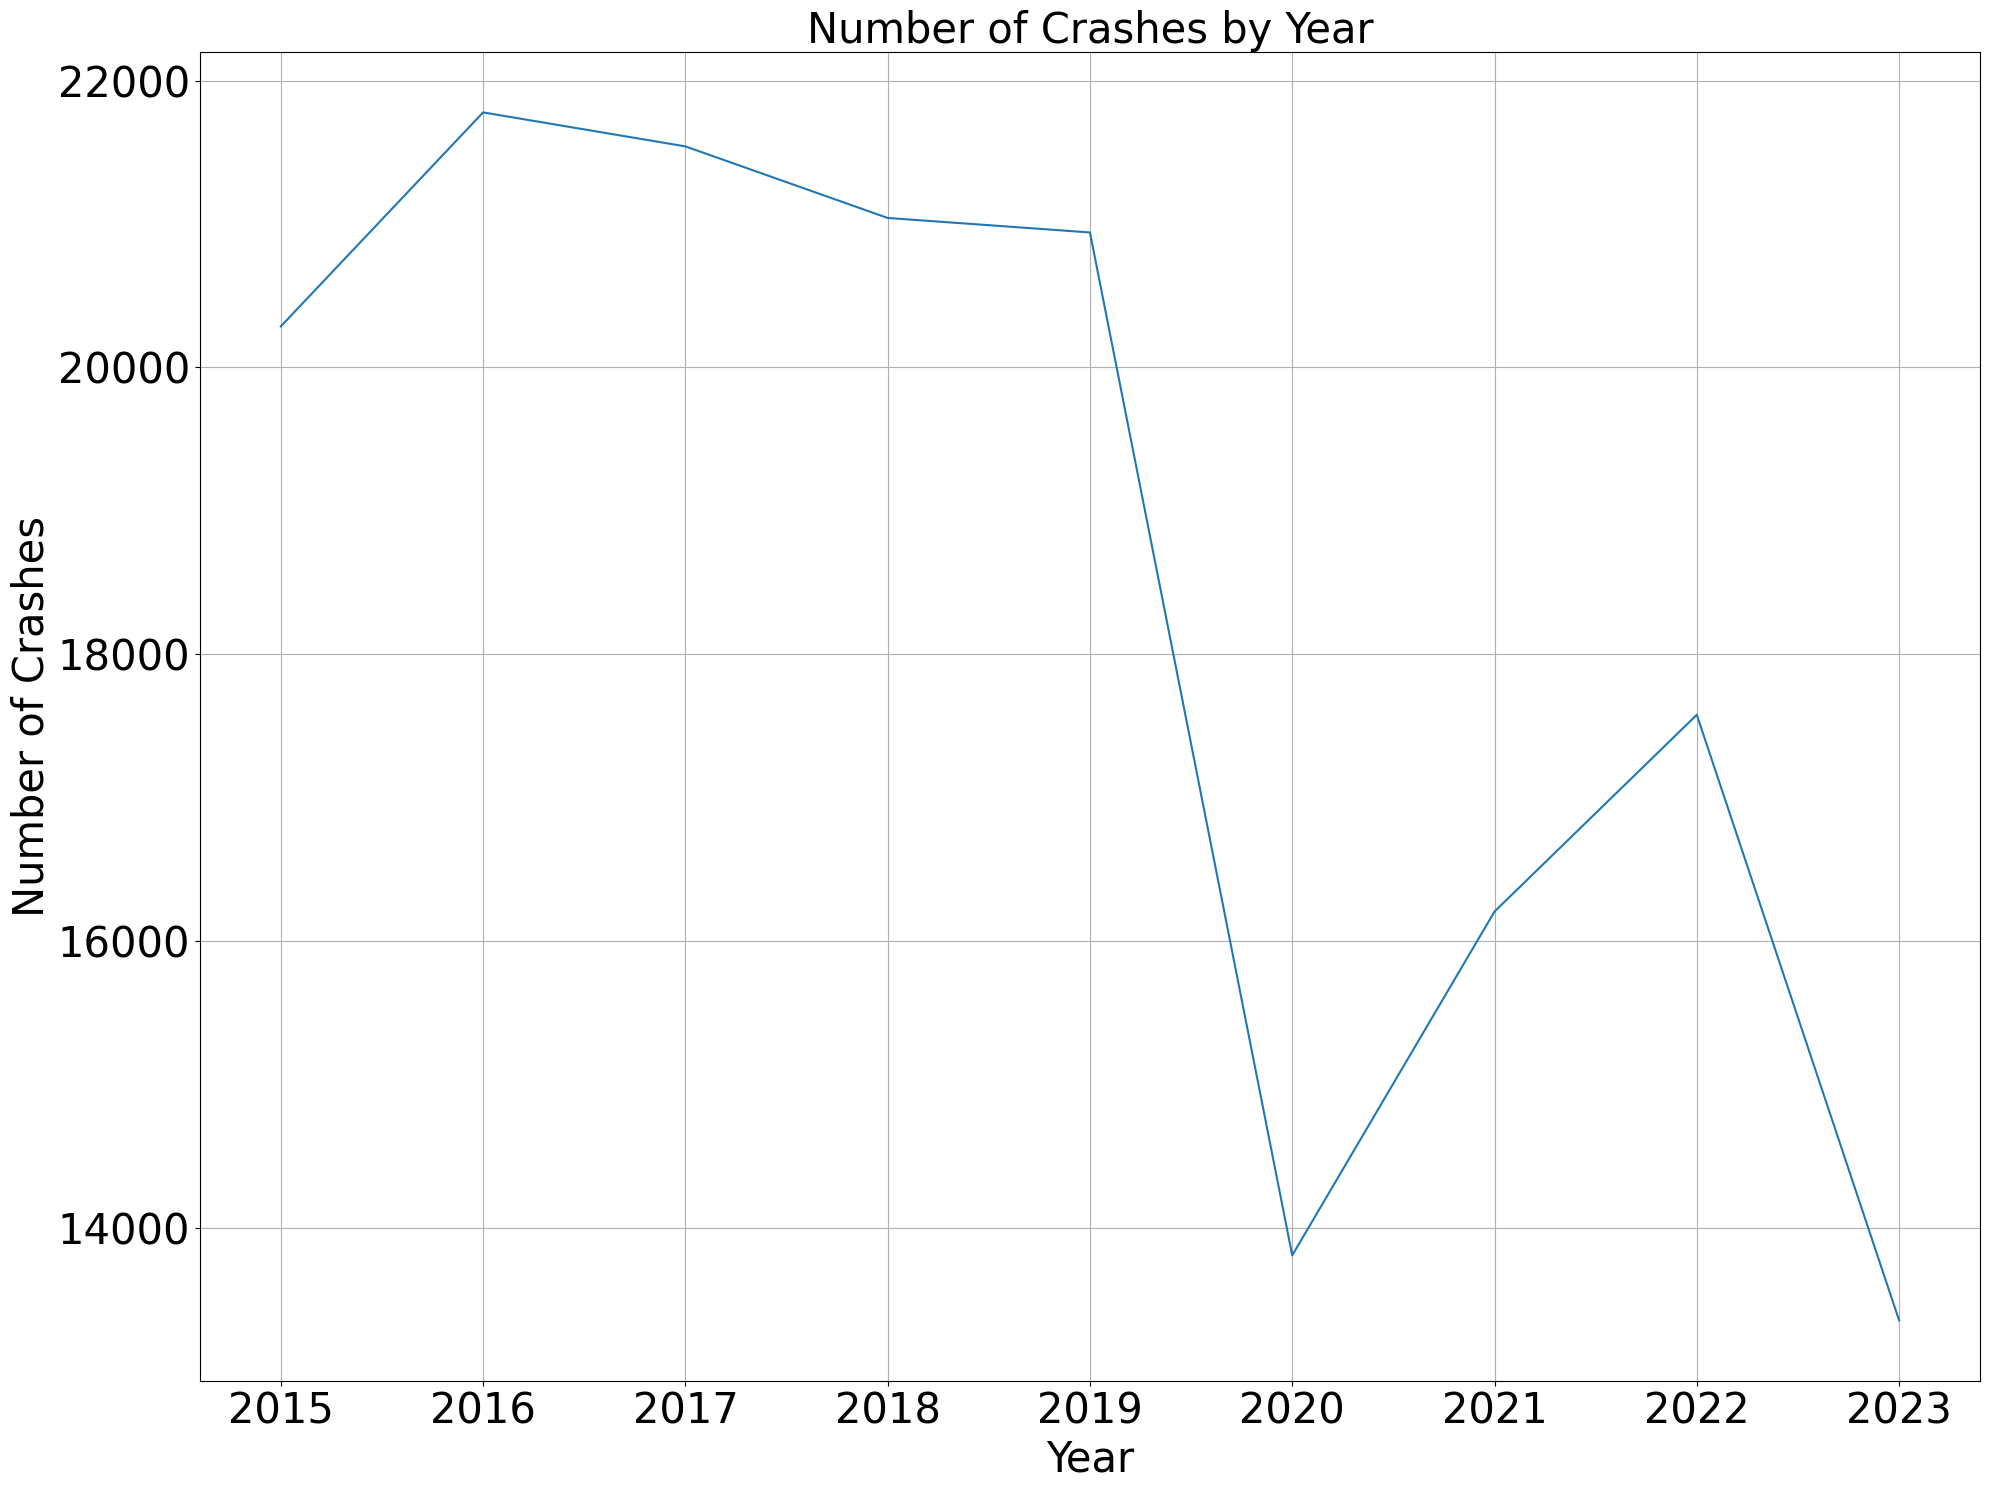

In [20]:
df['Crash Date/Time'].dt.year.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Year',fontsize=30)
plt.xlabel('Year',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

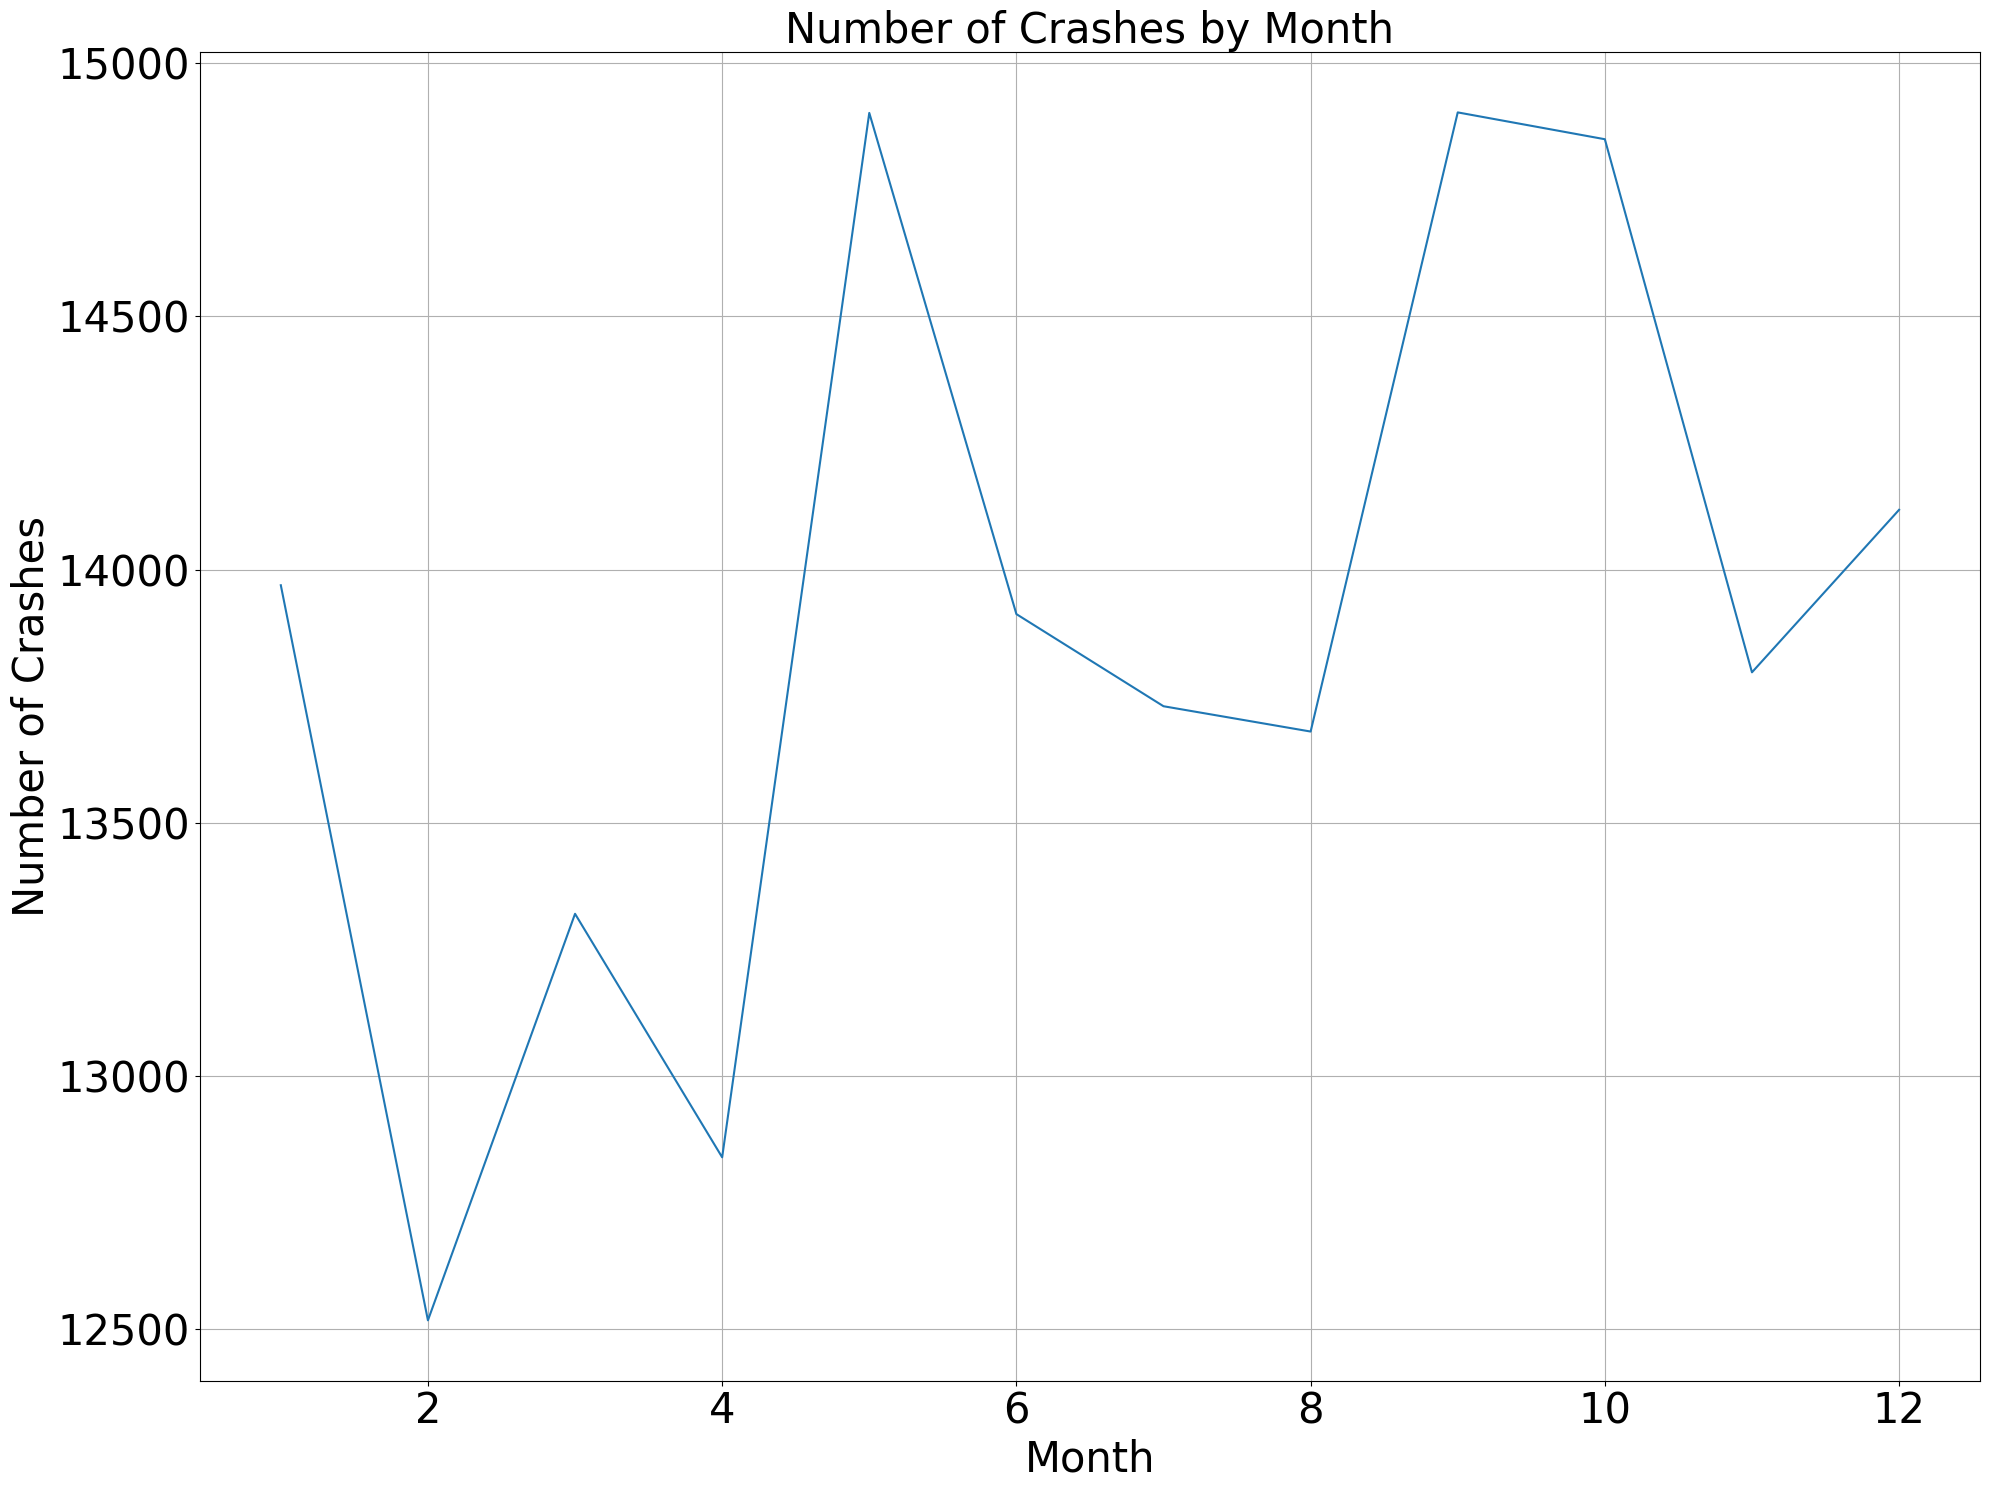

In [21]:
df['Crash Date/Time'].dt.month.value_counts().sort_index().plot(kind='line',figsize=(20, 15))
plt.title('Number of Crashes by Month', fontsize=30)
plt.xlabel('Month',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();

- Least number of crashes in 2020 possibly due to covid. 
- 2023 is notably less because the year isnt over yet

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

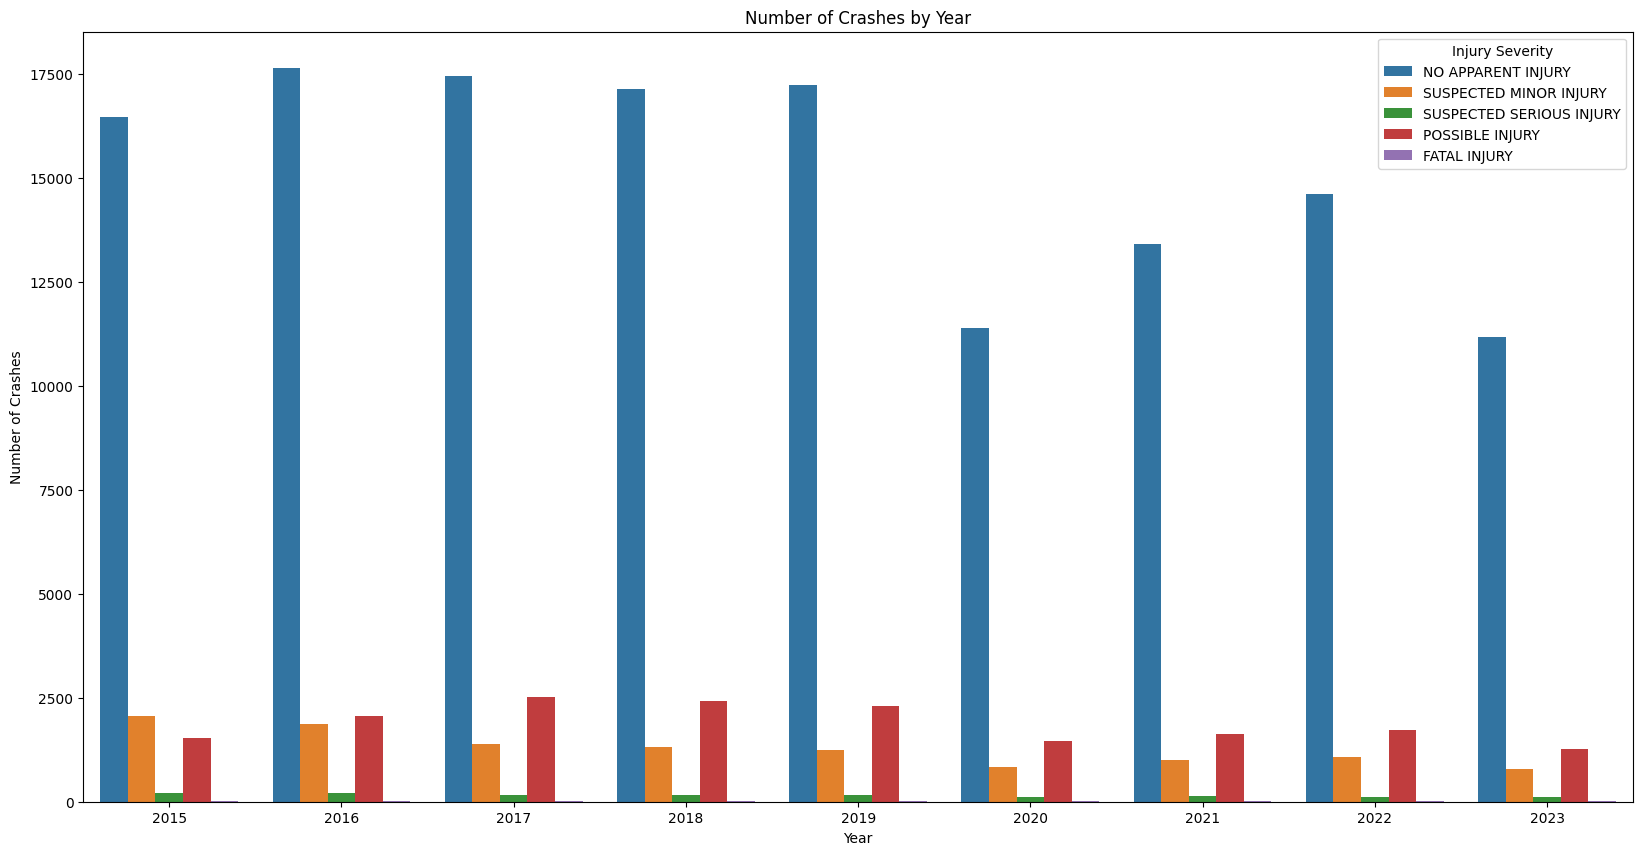

In [22]:
plt.figure(figsize=(20, 10))
sns.countplot(x=df['Crash Date/Time'].dt.year, hue=df['Injury Severity'])
plt.title('Number of Crashes by Year')
plt.xlabel('Year')
plt.ylabel('Number of Crashes');

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

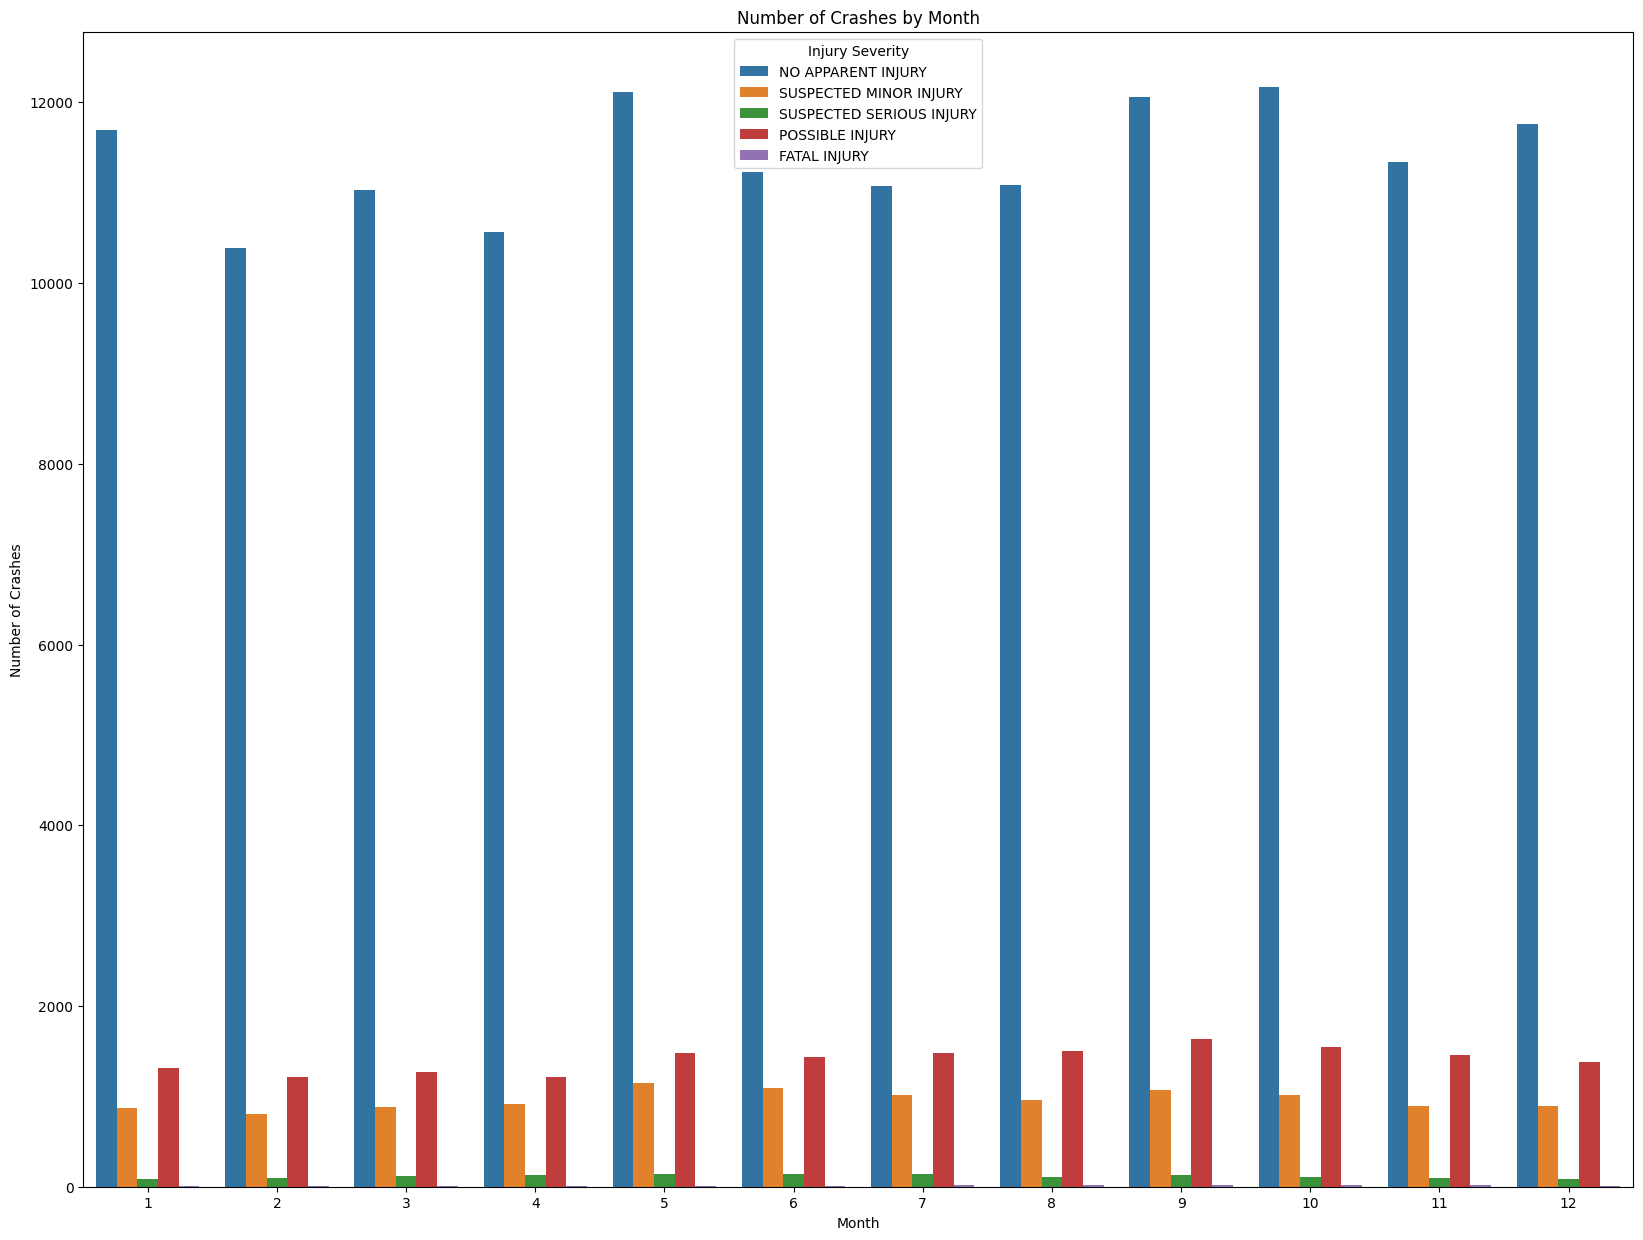

In [23]:
# crash monthly granularity
plt.figure(figsize=(20, 15))
sns.countplot(x=df['Crash Date/Time'].dt.month, hue=df['Injury Severity'])
plt.title('Number of Crashes by Month')
plt.xlabel('Month')
plt.ylabel('Number of Crashes');

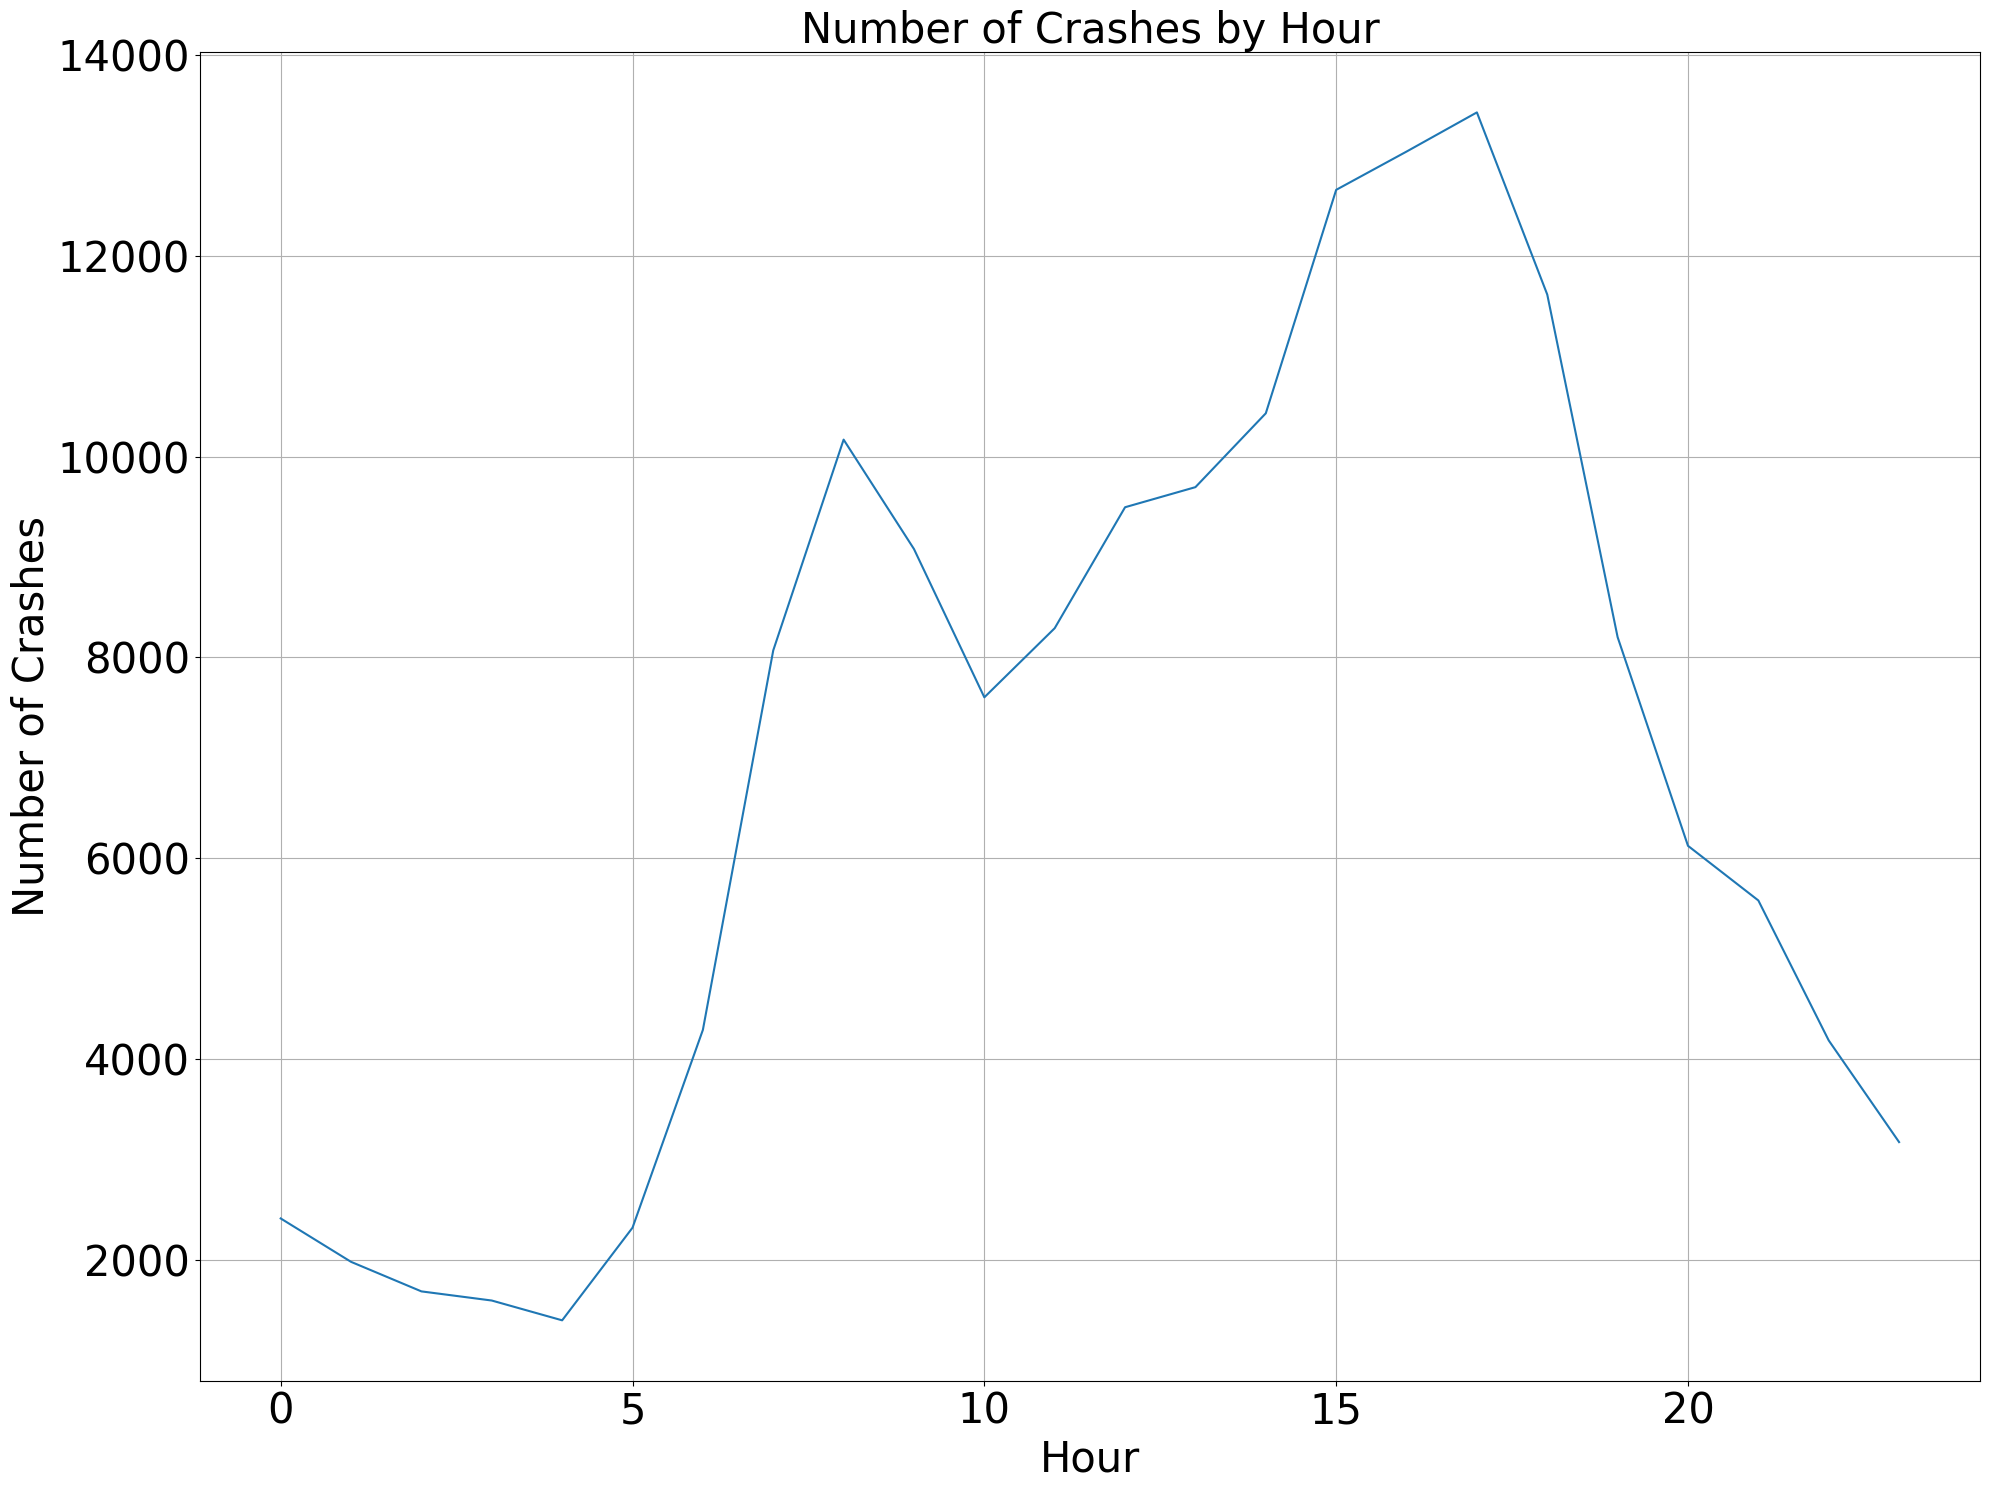

In [24]:
# accident hourly granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.hour.value_counts().sort_index().plot(kind='line')
#sns.countplot(x=df['Crash Date/Time'].dt.hour)
plt.title('Number of Crashes by Hour',fontsize=30)
plt.xlabel('Hour', fontsize=30)
plt.ylabel('Number of Crashes', fontsize=30);
# inrease the fontsize of the xticks and yticks
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.grid(True)
plt.tight_layout();


- Peak around 6pm due to rush hours

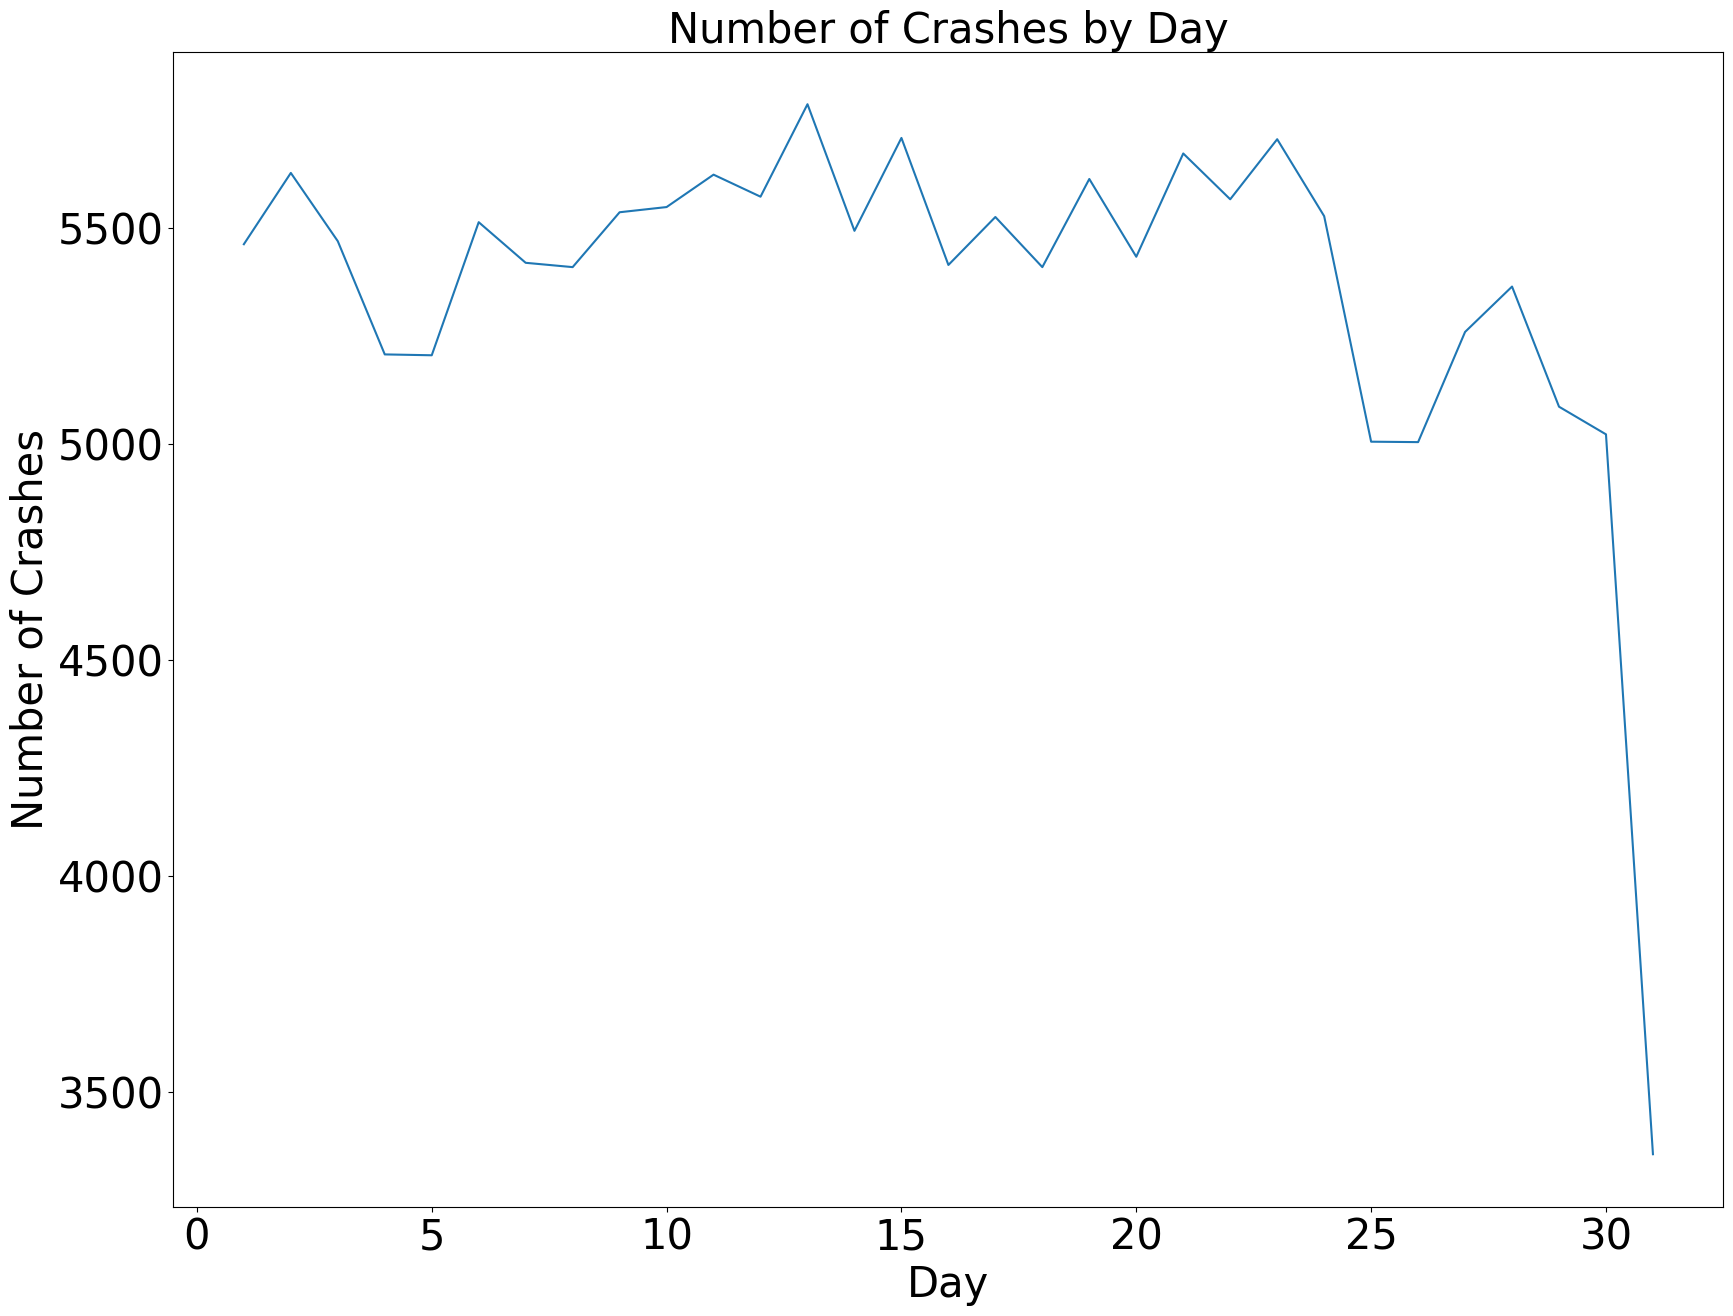

In [25]:
# accident daily granularity and make it a line plot
plt.figure(figsize=(20, 15))
df['Crash Date/Time'].dt.day.value_counts().sort_index().plot(kind='line')
plt.title('Number of Crashes by Day',fontsize=30)
plt.xlabel('Day',fontsize=30)
plt.ylabel('Number of Crashes',fontsize=30)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30);


/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


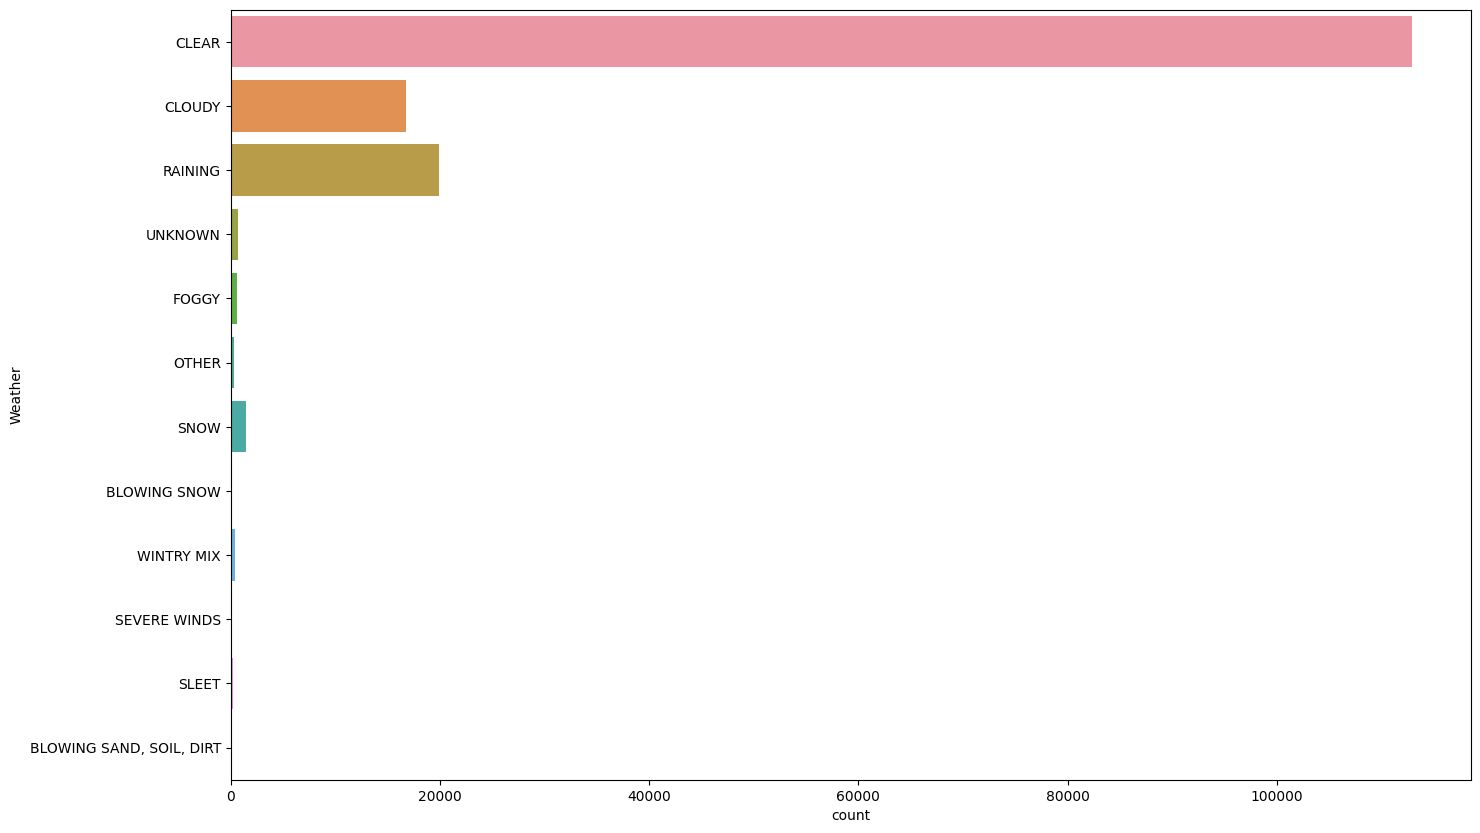

In [26]:
plt.figure(figsize=(16, 10))
sns.countplot(y=df['Weather']);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


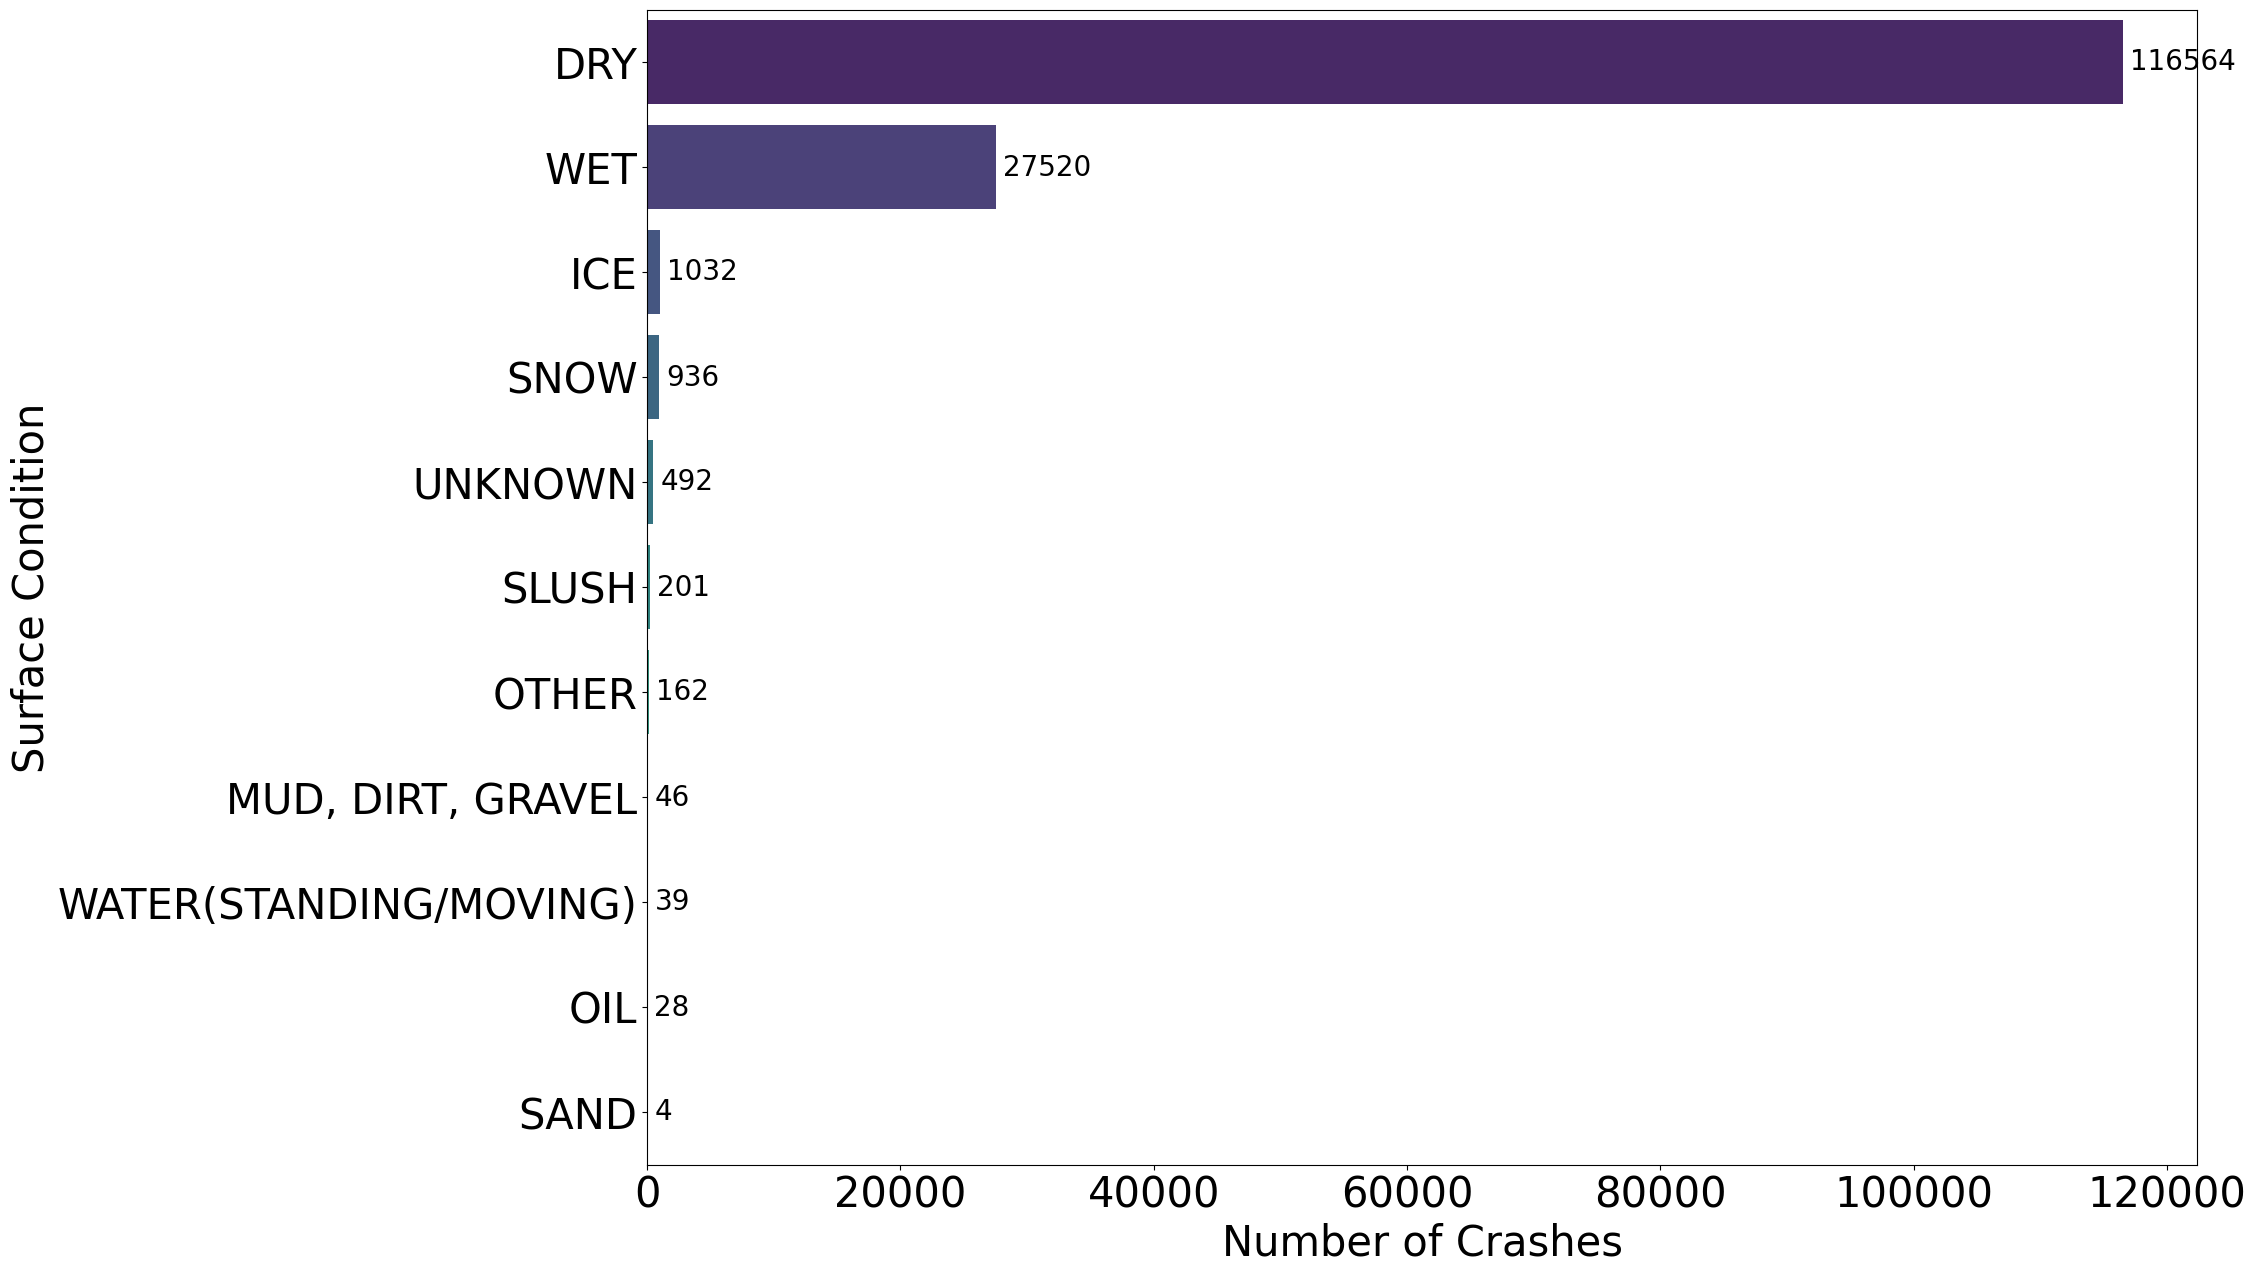

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(20, 15))

# Order bars by count
order = df['Surface Condition'].value_counts().index

# Plot
ax = sns.countplot(y=df['Surface Condition'], order=order, palette="viridis")

# Annotate bars with their counts
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2.), 
                va='center', ha='left', xytext=(5,0), textcoords='offset points', fontsize=20)
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.xlabel('Number of Crashes',fontsize=30)
plt.ylabel('Surface Condition',fontsize=30)

plt.show()


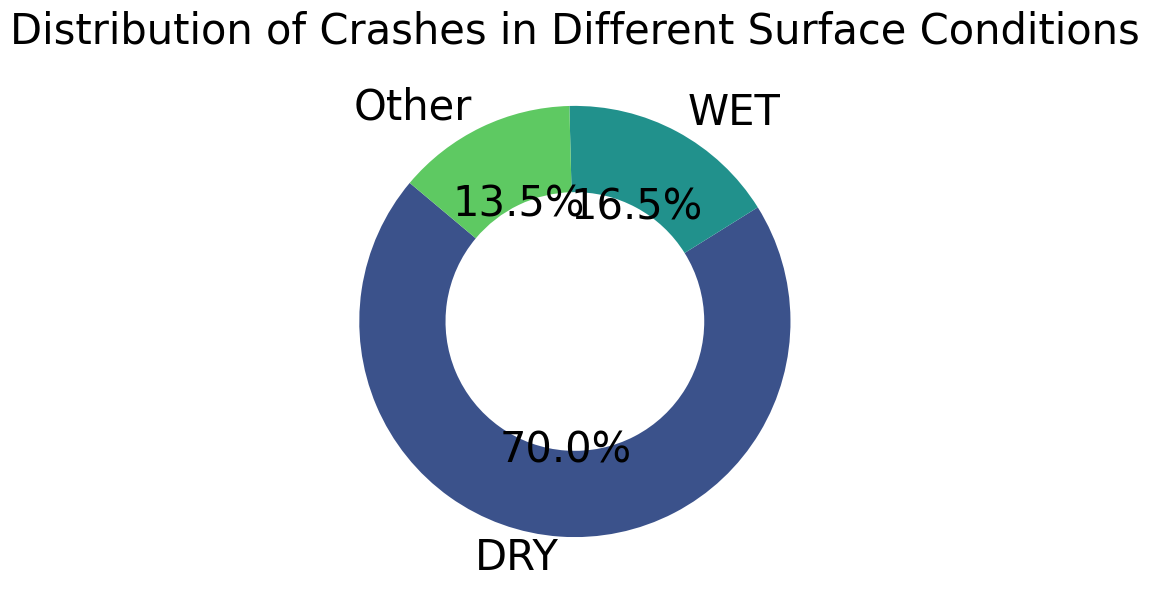

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns
df['Modified Conditions']=df['Surface Condition'].apply(lambda x: 'Other' if x not in ['WET','DRY'] else x)

# Data preparation
surface_condition_counts = df['Modified Conditions'].value_counts()

# Plotting the donut chart
plt.figure(figsize=(15, 7))
colors = sns.color_palette("viridis", len(surface_condition_counts))
plt.pie(surface_condition_counts, labels=surface_condition_counts.index, colors=colors, autopct='%1.1f%%', startangle=140, wedgeprops=dict(width=0.4), textprops={'fontsize': 30})
plt.title('Distribution of Crashes in Different Surface Conditions', fontsize=30)

plt.show()


# Model Building 
Before building the models, we performed the following additional preprocessing steps
- Used Kmeans to cluster the longitudes and latutitudes and created a new feature that contains the resulting clusters
- Grouped the date/time columns as follows:
    - Day column was grouped into beginning, middle, and end of the month
    - Hour column was grouped into morning, afternoon, evening, and night
    - Month column was grouped into summer, winter, spring, and fall
   
- We grouped all instatnces of injury and fatality in the injury severity column as injury and others as no injury
 loss. Also, we will benefit from the improved speed that comes with working with less obeservations
## Handling Missing Values
- We dropped the following columns because they have too many missing values: 'Off-Road Description', 'Municipality', 'Related Non-Motorist', 'Circumstance', 'Non-Motorist Substance Abuse'
- For the remaining missing values, we dropped the rows with missing values and assessed data loss afterwards; however, we stored the resulting dataframe separately.
- We decided to drop the rows because we have many observations in the dataset
- After dropping the missing values, we assessed the data loss; we found that dropping the missing values did not lead to significant data
 - In addition to dropping null values, we dropped all the observations with unknown
- All Eda was done using the original dataframe, while modelling was done using the cleaned dataframe.

## Class Distribution 
- There is a class imbalance in the data set with a ratio of 70-30 with the postive instances being the minority class.
- To deal with this we tried several methods. First, we used the inbuilt class weight funtion in Random forest. To assigns a bigger weight to the minority class. Since XGBoost doesnt have the class weight paramet, we used its  equivalent for XGBoost which is Scale-pos-weight.
- We also tried undersampling to see if performance will improve. We thought this will be a good idea because the dataset is large, and we would benefit from the improved speed.

In [29]:
df2['Injury Severity'].value_counts(normalize=True)

Injury Severity
NO APPARENT INJURY          0.792072
POSSIBLE INJURY             0.118874
SUSPECTED MINOR INJURY      0.079526
SUSPECTED SERIOUS INJURY    0.008783
FATAL INJURY                0.000745
Name: proportion, dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


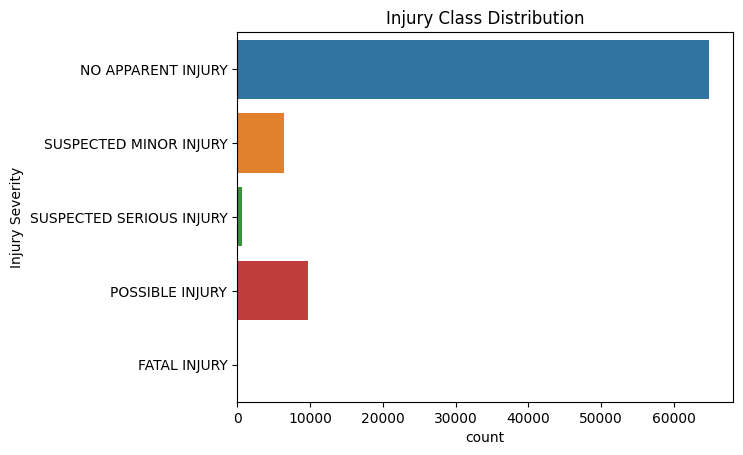

In [30]:
sns.countplot(y=df2['Injury Severity']);
plt.title('Injury Class Distribution');

In [31]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 81860 entries, 1 to 166535
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   ACRS Report Type                81860 non-null  object        
 1   Crash Date/Time                 81860 non-null  datetime64[ns]
 2   Route Type                      81860 non-null  object        
 3   Road Name                       81860 non-null  object        
 4   Cross-Street Type               81860 non-null  object        
 5   Cross-Street Name               81860 non-null  object        
 6   Collision Type                  81860 non-null  object        
 7   Weather                         81860 non-null  object        
 8   Surface Condition               81860 non-null  object        
 9   Light                           81860 non-null  object        
 10  Traffic Control                 81860 non-null  object        
 11  Driver

In [32]:
# drop observations with 'UNKNOWN' and 'Unknown' in the entire dataset
df2=df.dropna()
df2.replace(['UNKNOWN', 'Unknown'], np.nan, inplace=True)
df2.dropna(inplace=True)
df2.shape

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3651761744.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace(['UNKNOWN', 'Unknown'], np.nan, inplace=True)
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3651761744.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.dropna(inplace=True)


(61173, 33)

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


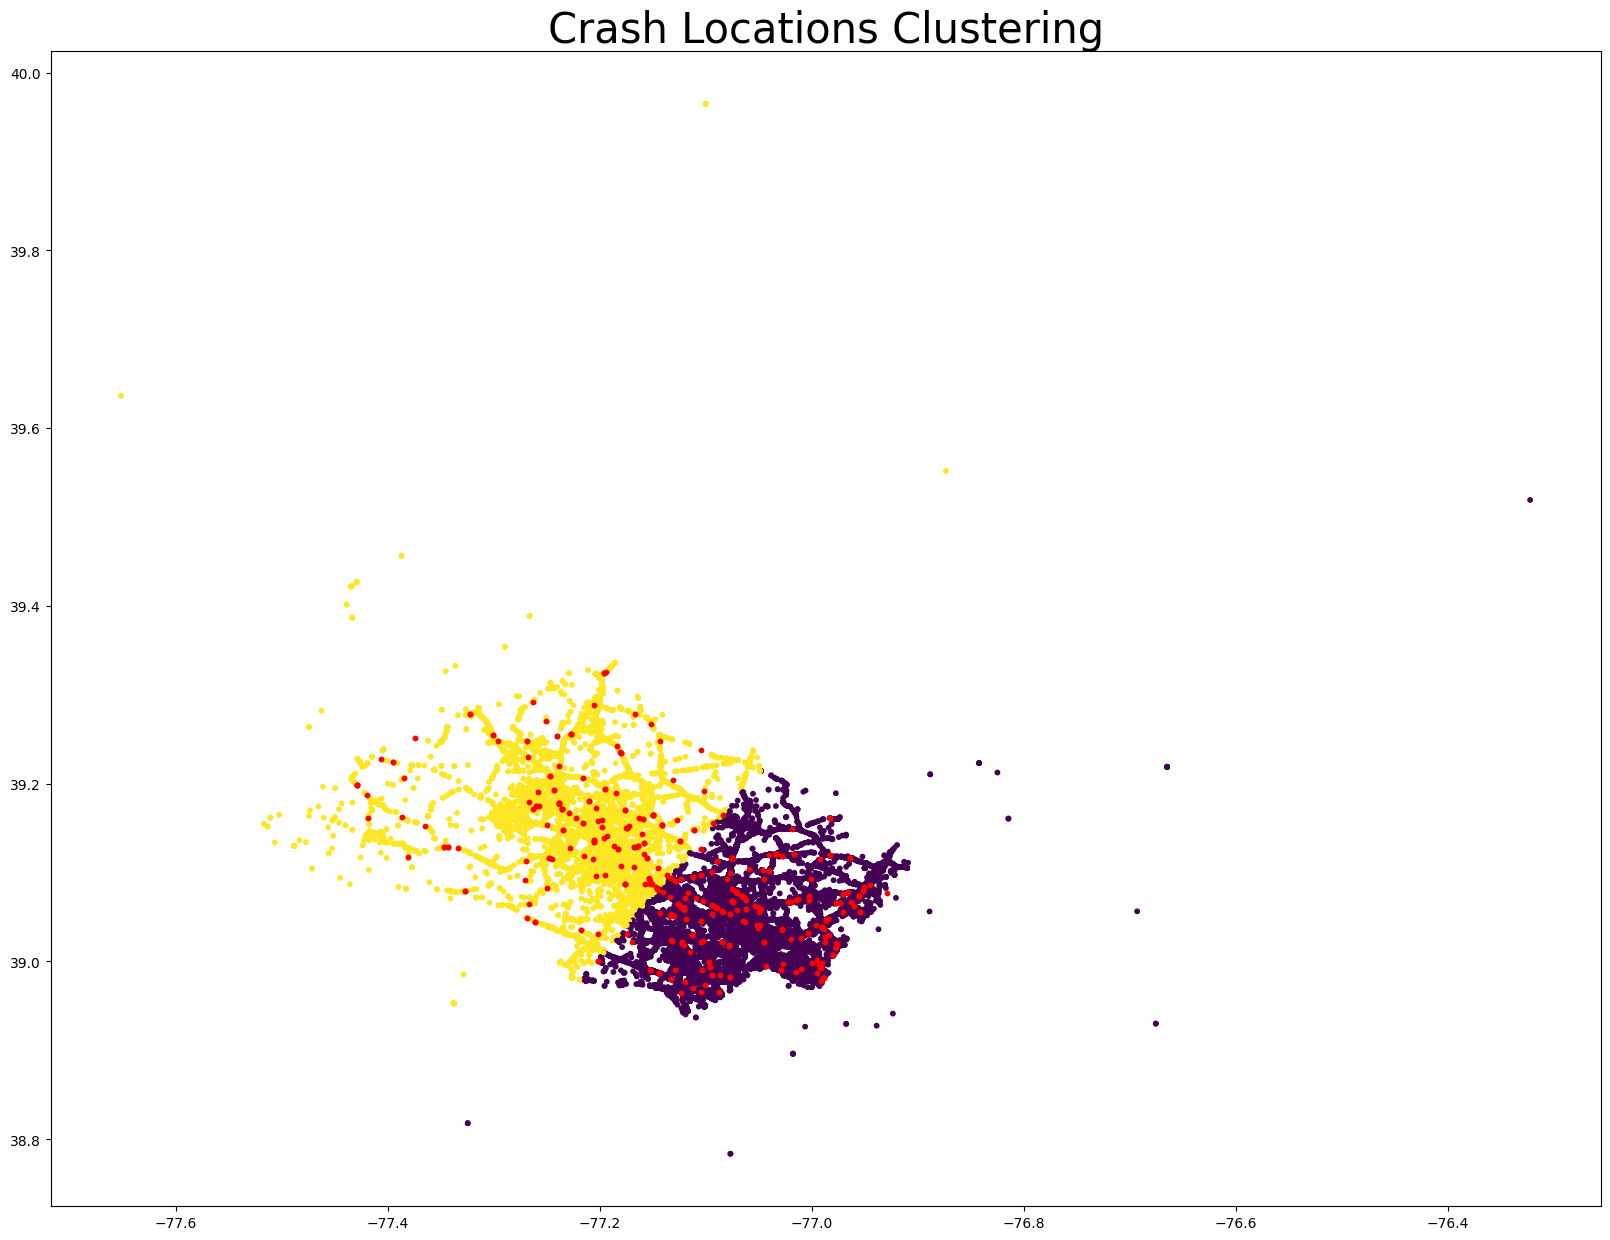

In [33]:
model=KMeans(n_clusters=2)
model.fit(df2[['Longitude','Latitude']])
clusters=model.predict(df2[['Longitude','Latitude']])
plt.figure(figsize=(20, 15))
plt.scatter(df2['Longitude'],df2['Latitude'],c=clusters,s=10,cmap='viridis')
plt.title('Crash Locations Clustering',fontsize=30)

plt.scatter (Fatal_Crashes['Longitude'],
                Fatal_Crashes['Latitude'],
                color='red',
                s=10);


In [34]:
df2['location_cluster']=clusters
df2.drop(['Longitude','Latitude'],axis=1,inplace=True)
df2['location_cluster'].value_counts()

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3967966888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_cluster']=clusters
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3967966888.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Longitude','Latitude'],axis=1,inplace=True)


location_cluster
0    37734
1    23439
Name: count, dtype: int64

In [35]:
df2['location_cluster'].replace({0:'Location_cluster_1',1:'Location_cluster_2'},inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/1207298911.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['location_cluster'].replace({0:'Location_cluster_1',1:'Location_cluster_2'},inplace=True)


In [36]:
df2['location_cluster'].value_counts()

location_cluster
Location_cluster_1    37734
Location_cluster_2    23439
Name: count, dtype: int64

In [37]:
# print the value_counts for each categorical feature using for loop
for col in df2.select_dtypes(include='object').columns:
    print(df2[col].value_counts())
    print('---------------------')


ACRS Report Type
Property Damage Crash    36264
Injury Crash             24857
Fatal Crash                 52
Name: count, dtype: int64
---------------------
Route Type
Maryland (State)        31507
County                  21699
Municipality             3410
US (State)               2781
Interstate (State)        929
Other Public Roadway      418
Ramp                      248
Government                169
Service Road               12
Name: count, dtype: int64
---------------------
Road Name
GEORGIA AVE          4323
FREDERICK RD         2476
NEW HAMPSHIRE AVE    2377
CONNECTICUT AVE      1848
ROCKVILLE PIKE       1763
                     ... 
POPLAR HILL RD          1
HAYWOOD DR              1
KINCAID TERR            1
HORNELL DR              1
ALLSPICE RD             1
Name: count, Length: 2025, dtype: int64
---------------------
Cross-Street Type
County                  37174
Maryland (State)        10387
Municipality             7920
Ramp                     2660
Other Public Road

In [38]:
# Separating datetime to year, month, day, hour. However, we will not use year as it is not a good predictor
df2['Month'] = df2['Crash Date/Time'].dt.month
df2['Day'] = df2['Crash Date/Time'].dt.day
df2['Hour'] = df2['Crash Date/Time'].dt.hour

# Group months into seasons, hour into morning, afternoon, evening, night
df2['Season'] = df2['Month'].apply(lambda x: 'Winter' if x in [12, 1, 2] else ('Spring' if x in [3, 4, 5] else ('Summer' if x in [6, 7, 8] else 'Fall')))
df2['Time of Day'] = df2['Hour'].apply(lambda x: 'Morning' if x in [6, 7, 8, 9, 10, 11] else ('Afternoon' if x in [12, 13, 14, 15, 16, 17] else ('Evening' if x in [18, 19, 20, 21, 22, 23] else 'Night')))
df2['Time of Month'] = df2['Day'].apply(lambda x: 'Start' if x in [1, 2, 3, 4, 5, 6, 7] else ('Middle' if x in [8, 9, 10, 11, 12, 13, 14] else 'End'))
df2.drop(['Crash Date/Time', 'Month', 'Day', 'Hour'], axis=1, inplace=True)


/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3041663656.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Month'] = df2['Crash Date/Time'].dt.month
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3041663656.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Day'] = df2['Crash Date/Time'].dt.day
/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3041663656.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFr

In [39]:
# dropping the following columns because they have too many unique values; they most likely wont be good predictors, and some of them are identifiers: Veicle Make, Vehicle Model, Drivers License State, Roade Name,and Cross-Street Name
df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/3894706603.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.drop(['Vehicle Make', 'ACRS Report Type', 'Vehicle Model', 'Drivers License State', 'Road Name', 'Cross-Street Name'], axis=1, inplace=True)


In [40]:
df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)

/var/folders/rj/g3r71fsx2vnbbbjb9v368gr00000gp/T/ipykernel_8808/2161008410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2.replace({'Injury Severity': {'POSSIBLE INJURY': 1, 'SUSPECTED MINOR INJURY': 1, 'SUSPECTED SERIOUS INJURY': 1, 'FATAL INJURY': 1, 'NO APPARENT INJURY': 0}}, inplace=True)


In [41]:
df2['Injury Severity'].value_counts(normalize=True) 

Injury Severity
0    0.793667
1    0.206333
Name: proportion, dtype: float64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


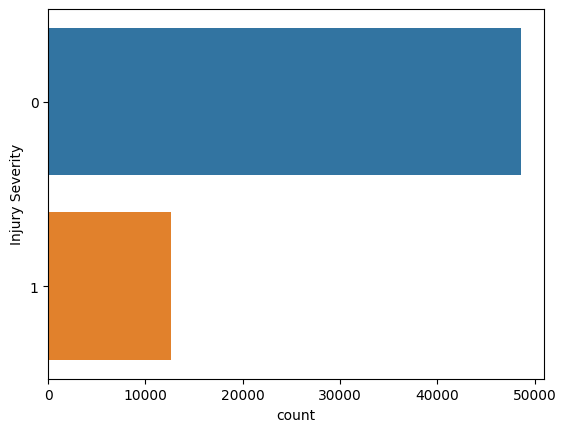

In [42]:
sns.countplot(y=df2['Injury Severity']);

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

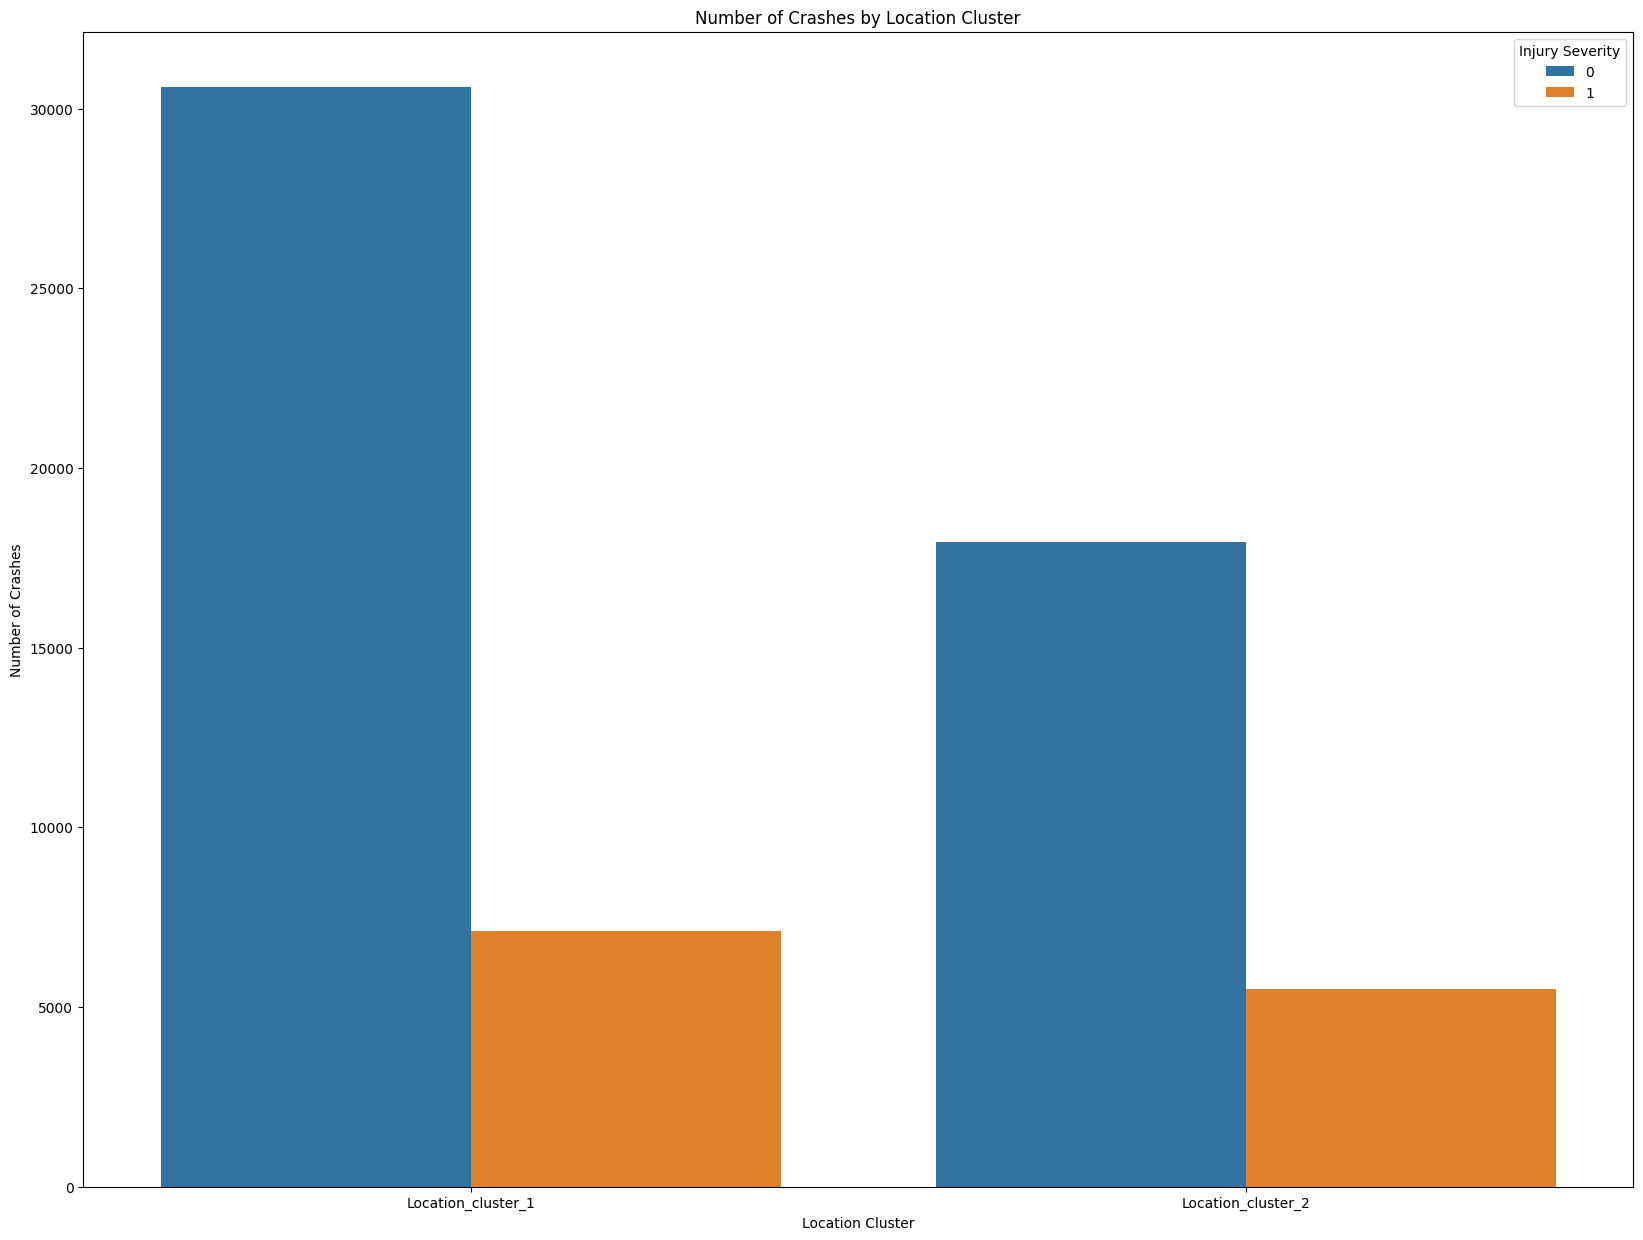

In [43]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['location_cluster'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Location Cluster')
plt.xlabel('Location Cluster')
plt.ylabel('Number of Crashes');

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

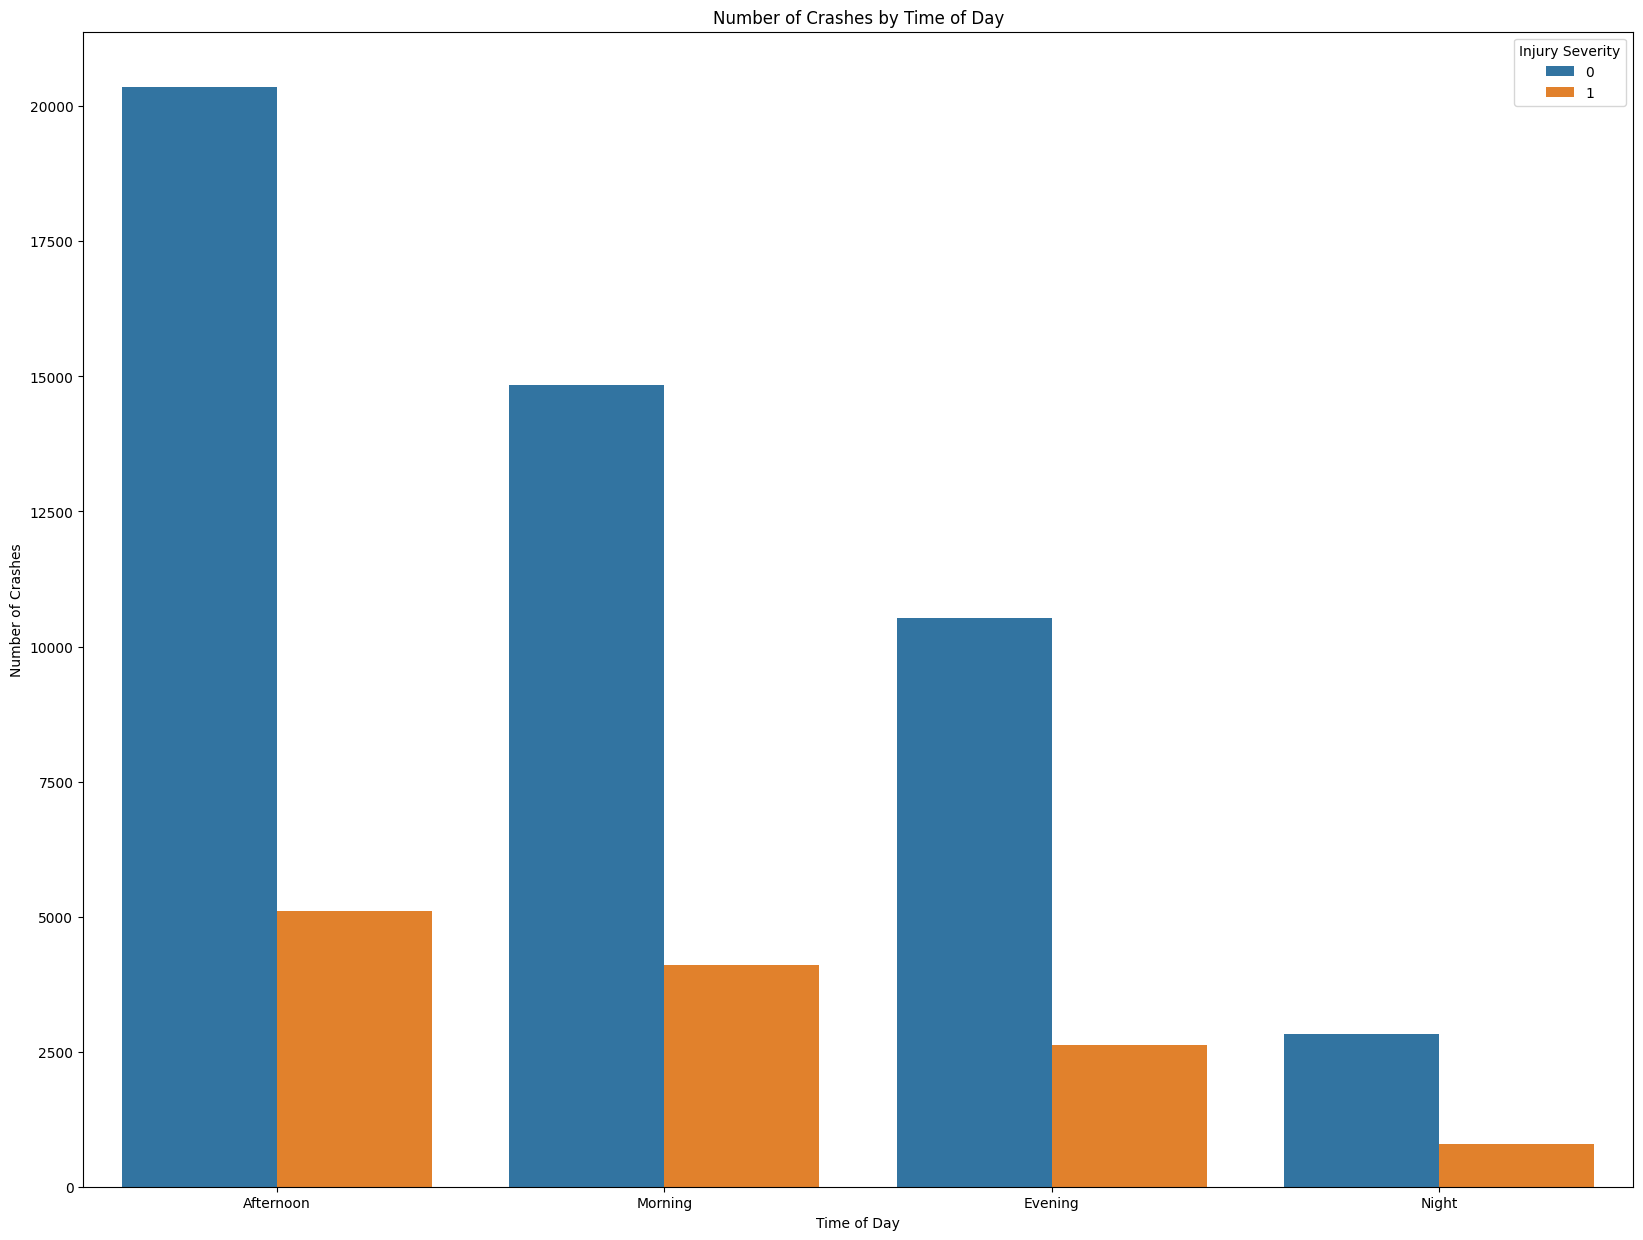

In [44]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Day'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Number of Crashes');


/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

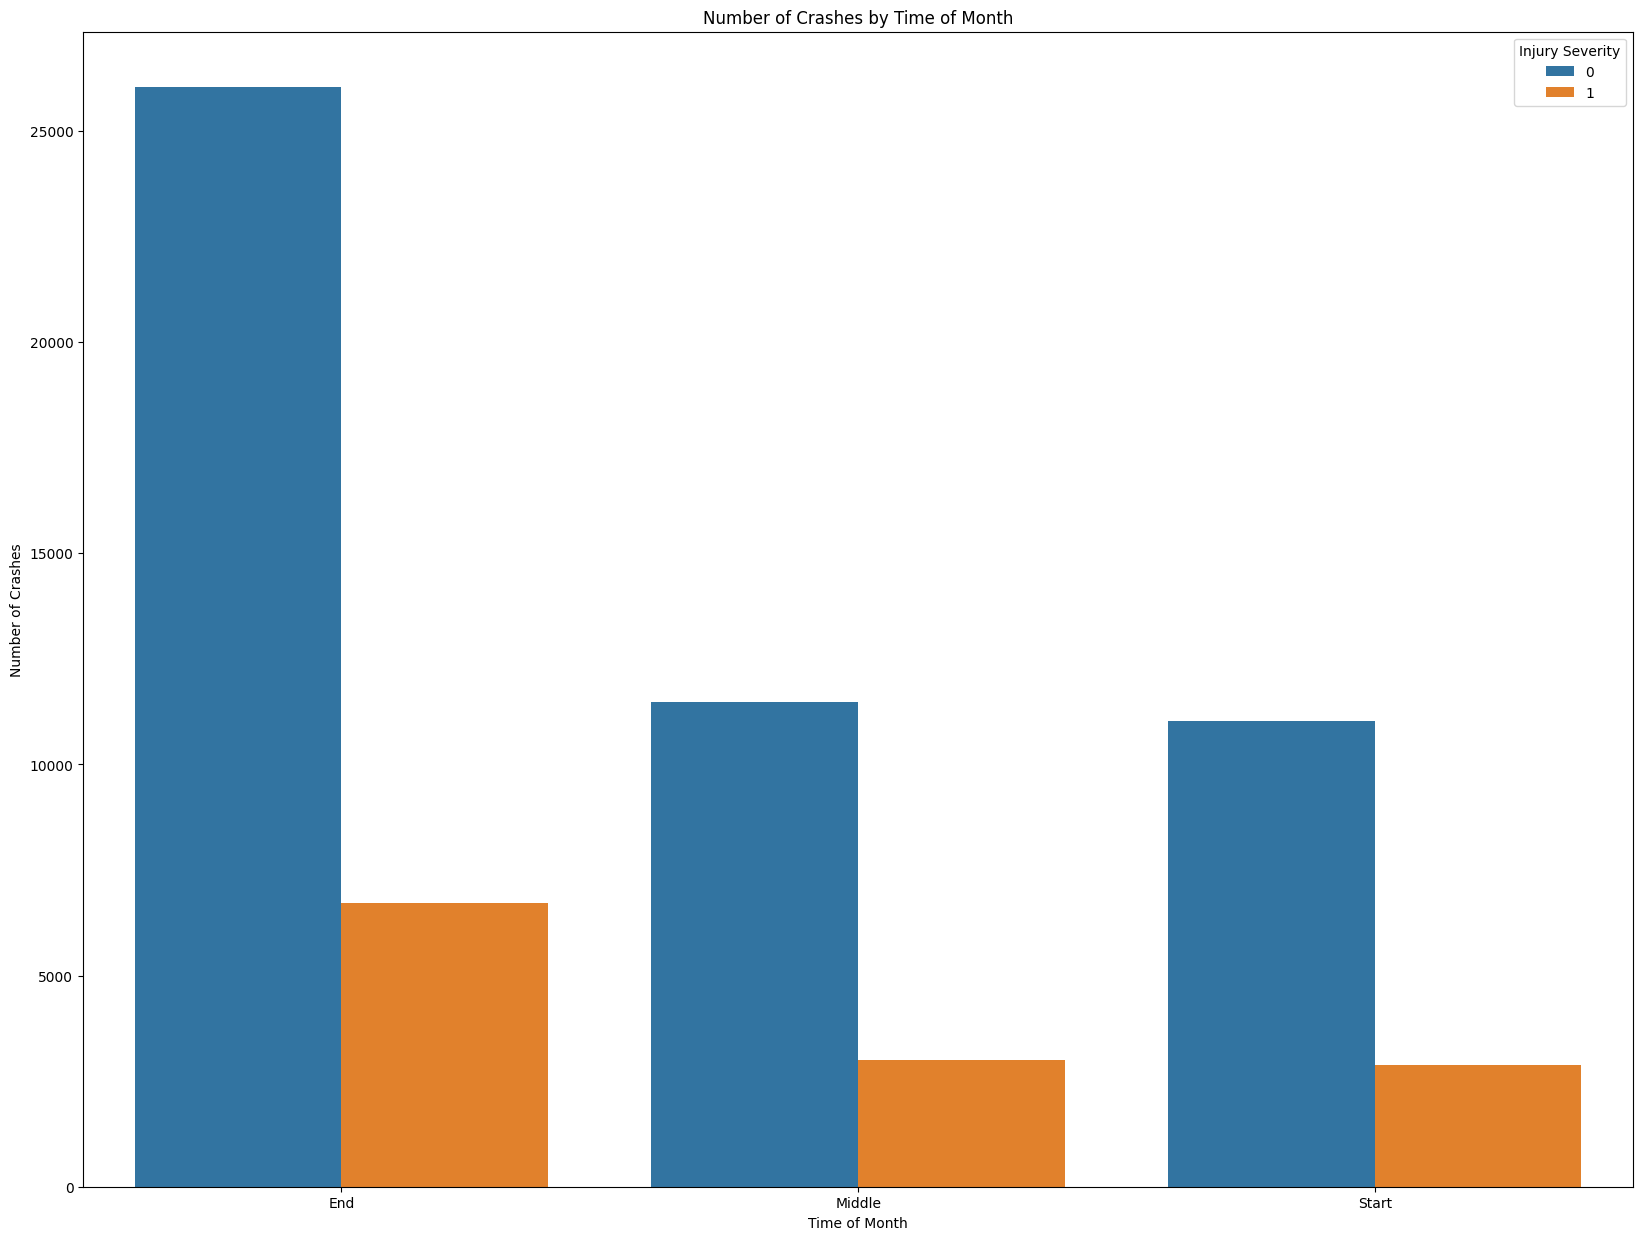

In [45]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Time of Month'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Time of Month')
plt.xlabel('Time of Month')
plt.ylabel('Number of Crashes');

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Ca

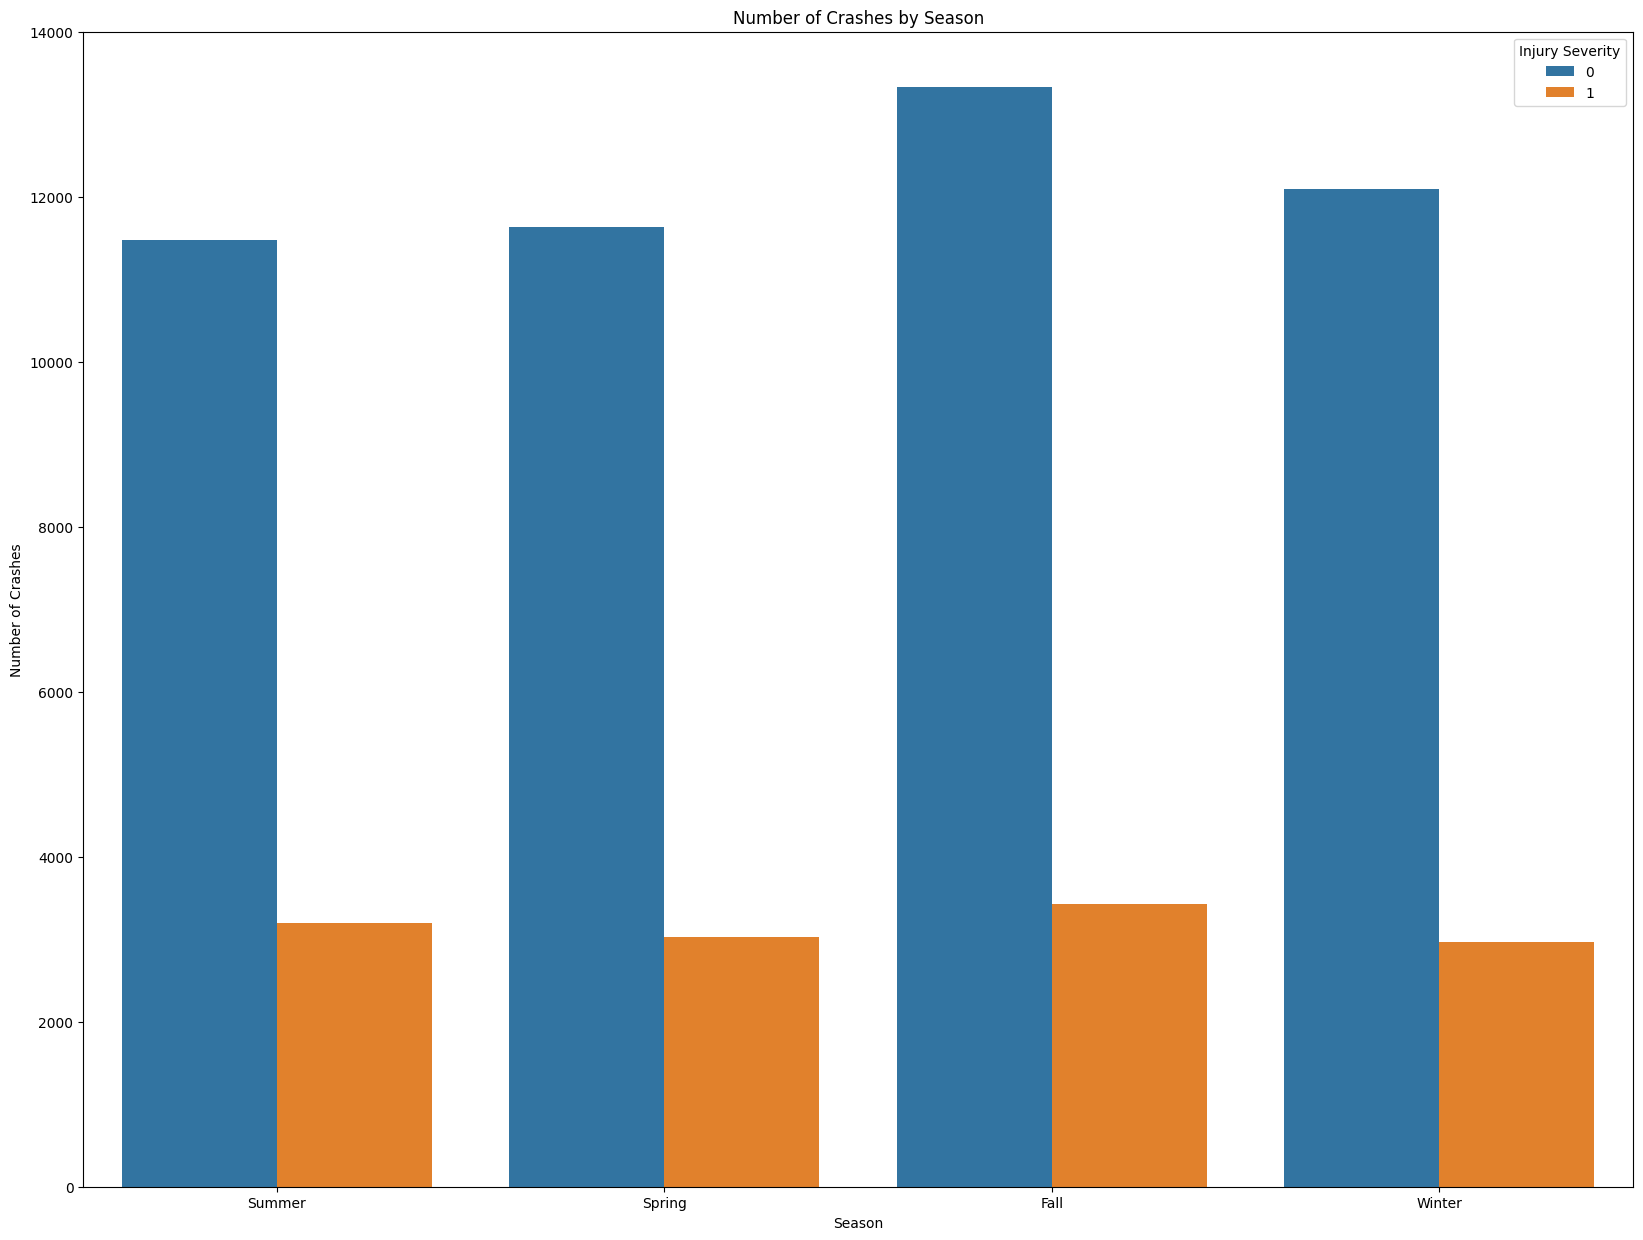

In [46]:
plt.figure(figsize=(20, 15))
sns.countplot(x=df2['Season'], hue=df2['Injury Severity'])
plt.title('Number of Crashes by Season')
plt.xlabel('Season')
plt.ylabel('Number of Crashes');

In [47]:
# Dummifying the categorical columns
cols_to_dummy=df2.select_dtypes(include='object').columns
df2=pd.get_dummies(df2,columns=cols_to_dummy,drop_first=True,dtype='int')

In [48]:
# Let us check the dimensioanlity of the data
df2.shape

(61173, 199)

In [49]:
X = df2.drop("Injury Severity", axis=1)
y = df2["Injury Severity"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


## Model Selection
- We opted for two tree based algorithms because we have many observations in our dataset, and these algorithms perform well in this case
- We selected RandomForest and Extreme Gradient Descent algorithms (XGBoost)

In [50]:
logreg = LogisticRegression(class_weight='balanced')
logreg.fit(X_train, y_train)
log_pred = logreg.predict(X_test)
print(classification_report(y_test, log_pred,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.89      0.59      0.71     16031
      Injury       0.32      0.73      0.44      4157

    accuracy                           0.62     20188
   macro avg       0.61      0.66      0.58     20188
weighted avg       0.77      0.62      0.66     20188



/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [51]:
# print coefficients and intercept for the top features in a dataframe
coef = pd.DataFrame(logreg.coef_.T, index=X_train.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


,coef
Vehicle Damage Extent_SUPERFICIAL,-1.454269
Vehicle Damage Extent_FUNCTIONAL,-1.129695
Collision Type_SAME DIRECTION SIDESWIPE,-0.898384
Vehicle Damage Extent_NO DAMAGE,-0.718301
Vehicle Body Type_MOTORCYCLE,0.669834
Collision Type_HEAD ON LEFT TURN,0.633881
Vehicle Second Impact Location_SIX OCLOCK,0.612886
Collision Type_HEAD ON,0.595422
Vehicle First Impact Location_SIX OCLOCK,0.592141
Driver At Fault_Yes,-0.553381


In [52]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced',max_depth=5)
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', max_depth=5, random_state=42)

In [53]:
importances = rf_model.feature_importances_

# Sorting and displaying feature importances
feature_importances = pd.Series(importances, index=X_train.columns).sort_values(ascending=False)
print(feature_importances)


Vehicle Damage Extent_DISABLING                                  0.141451
Vehicle Damage Extent_SUPERFICIAL                                0.123748
Driver At Fault_Yes                                              0.093244
Collision Type_SAME DIRECTION SIDESWIPE                          0.067625
Vehicle First Impact Location_SIX OCLOCK                         0.048554
                                                                   ...   
Vehicle Body Type_FARM VEHICLE                                   0.000000
Vehicle Body Type_CROSS COUNTRY BUS                              0.000000
Driver Distracted By_USING DEVICE OBJECT BROUGHT INTO VEHICLE    0.000000
Surface Condition_WATER(STANDING/MOVING)                         0.000000
Vehicle Body Type_FIRE VEHICLE/NON EMERGENCY                     0.000000
Length: 198, dtype: float64


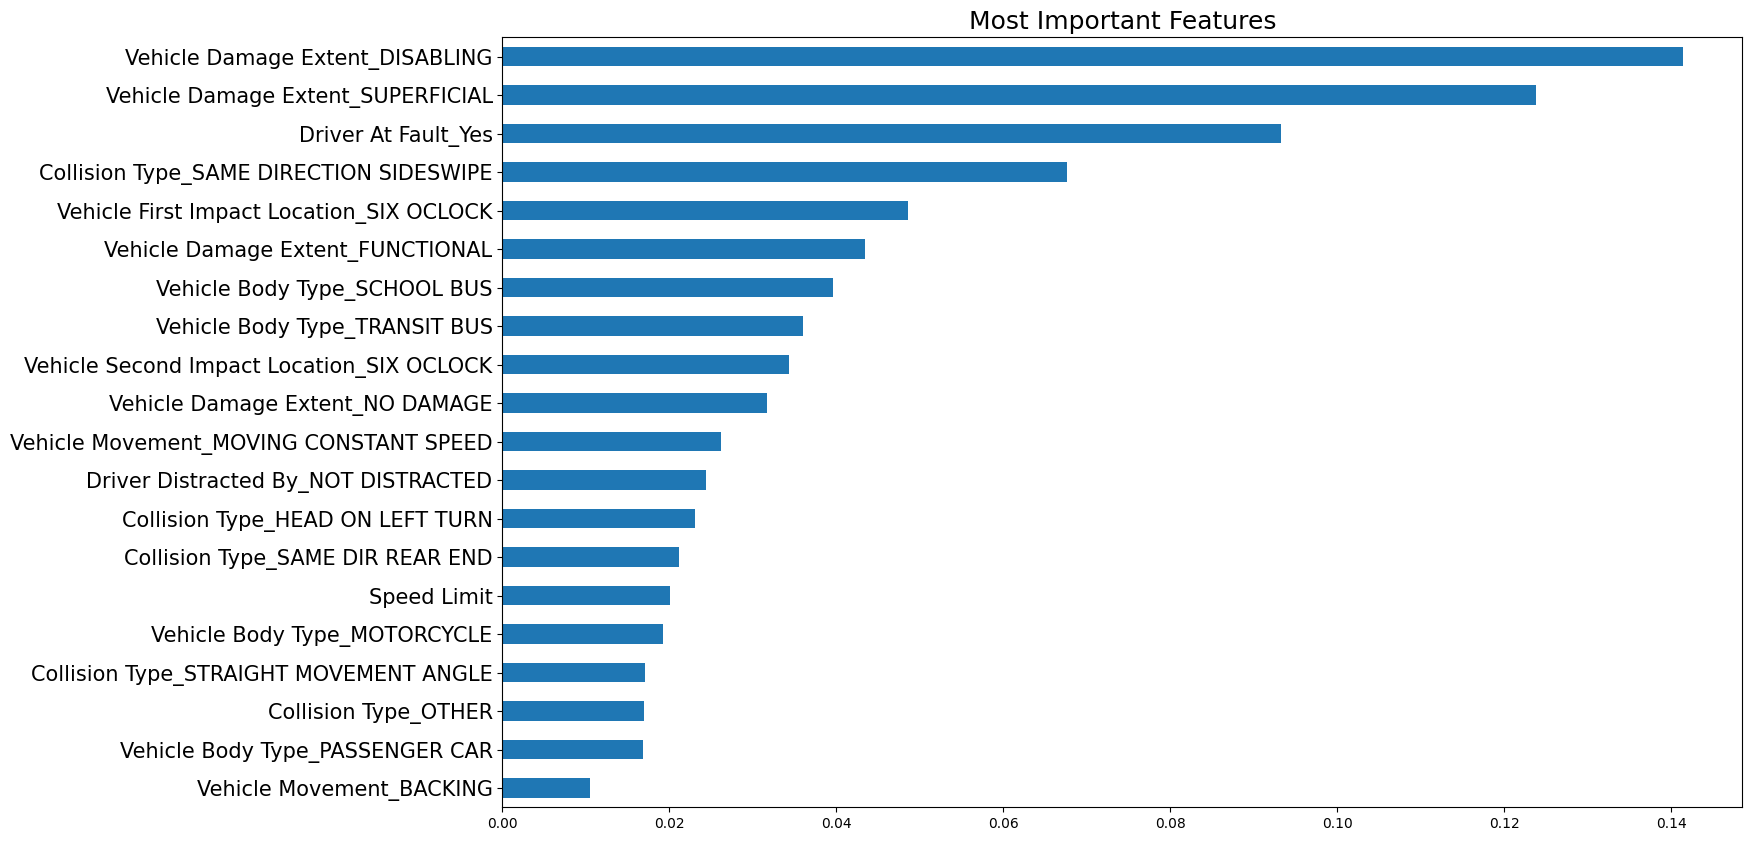

In [54]:
# Plotting the top features based on thier importance
(pd.Series(rf_model.feature_importances_, index=X.columns)
    .nlargest(20)  
    .plot(kind='barh', figsize=[16,10])
    .invert_yaxis()) 
plt.yticks(size=15)
plt.title('Most Important Features', size=18);

In [55]:
rfc_predictions=rf_model.predict(X_test)
print(classification_report(y_test,rfc_predictions,target_names=['No Injury','Injury']))

              precision    recall  f1-score   support

   No Injury       0.89      0.54      0.67     16031
      Injury       0.30      0.75      0.43      4157

    accuracy                           0.58     20188
   macro avg       0.60      0.65      0.55     20188
weighted avg       0.77      0.58      0.62     20188



In [56]:
scale_pos_weight = (y_train == 0).sum() / (y_train == 1).sum()



In [57]:
xgb_model = XGBClassifier(n_estimators=100, random_state=42, max_depth=5, scale_pos_weight=scale_pos_weight,tree_method='hist')
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [58]:
xgb_predictions=xgb_model.predict(X_test)
print(classification_report(y_test,xgb_predictions,target_names=['No Injury','Injury']))    

              precision    recall  f1-score   support

   No Injury       0.89      0.62      0.73     16031
      Injury       0.33      0.72      0.45      4157

    accuracy                           0.64     20188
   macro avg       0.61      0.67      0.59     20188
weighted avg       0.78      0.64      0.67     20188



In [99]:

# Calculate metrics
metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'Recall': recall_score,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc_score
}

xgb_metrics = {metric_name: metric_func(y_test, xgb_predictions) for metric_name, metric_func in metrics.items()}
rfc_metrics = {metric_name: metric_func(y_test, rfc_predictions) for metric_name, metric_func in metrics.items()}
log_metrics = {metric_name: metric_func(y_test, log_pred) for metric_name, metric_func in metrics.items()}  # Added this

# Create dataframe
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'Random Forest': rfc_metrics,
    'Logistic Regression': log_metrics  # Added this
})

comparison_df



,XGBoost,Random Forest,Logistic Regression
Accuracy,0.639390,0.584753,0.621359
Precision,0.328425,0.298339,0.317109
Recall,0.719028,0.751985,0.727207
F1 Score,0.450898,0.427195,0.441636
ROC AUC,0.668883,0.646687,0.660559


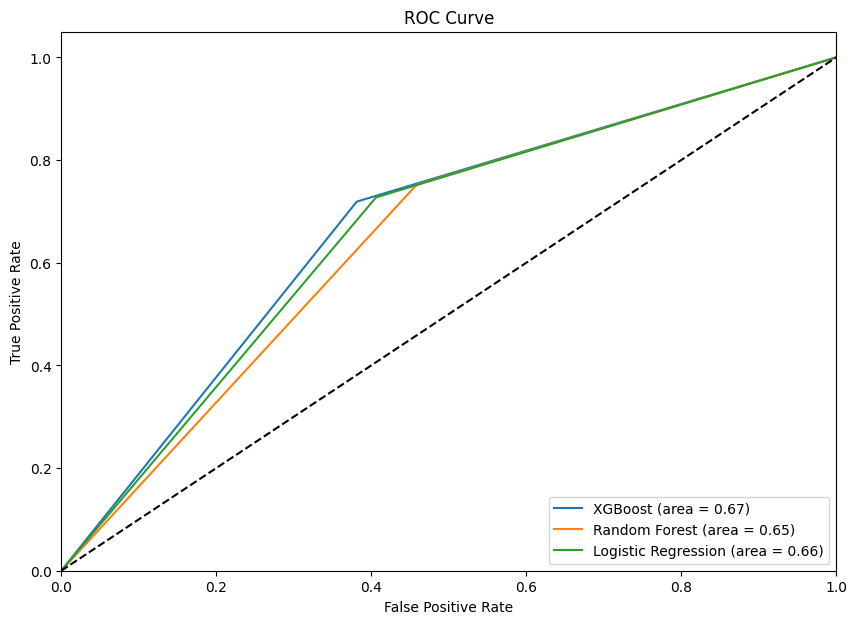

In [60]:
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_predictions)
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred)

plt.figure(figsize=(10, 7))
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (area = {auc(fpr_rfc, tpr_rfc):.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {auc(fpr_log, tpr_log):.2f})')  # Corrected this line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


## Resampling Method to Improve Model Performance
- The model seems to be biased towards the positive class--that is, it is very sensitive to the positive class and correctly classifies it for the most part. However, it is also misclassifying many negative instances. While this may be beneficial in the sense that emergency units will be aptly dispatched to incidents that are most emergent, it may also lead to subobtimal allocations. 
- We  believe this problem is stemming from the weights we used to address class imbalance in the dataset. 
- To address this, we will try undersampling the negative class. This approach seems viable because we have a relatively large dataset; therefore, we can make do with losing some observations while also improving training speed and performance

In [61]:

df_minority = df2[df2['Injury Severity']==1]
df_majority = df2[df2['Injury Severity']==0]

df_majority_downsampled = resample(df_majority, 
                                   replace=False,    # sample without replacement
                                   n_samples=len(df_minority),     # to match minority class
                                   random_state=42) 
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_downsampled['Injury Severity'].value_counts()


Injury Severity
1    12622
0    12622
Name: count, dtype: int64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


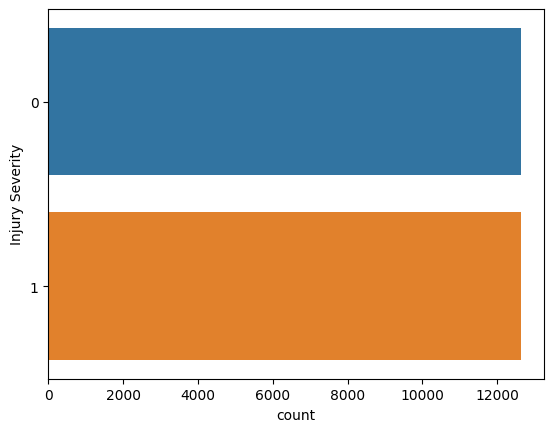

In [62]:
sns.countplot(y=df_downsampled['Injury Severity']);

In [63]:
X2 = df_downsampled.drop("Injury Severity", axis=1)
y2 = df_downsampled["Injury Severity"]
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X2, y2, test_size=0.33, random_state=42)

In [74]:
logreg_us = LogisticRegression(max_iter=10000)
logreg_us.fit(X_train_us, y_train_us)
log_pred_us = logreg_us.predict(X_test_us)
print(classification_report(y_test_us, log_pred_us,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.67      0.65      0.66      4167
      Injury       0.66      0.69      0.67      4164

    accuracy                           0.67      8331
   macro avg       0.67      0.67      0.67      8331
weighted avg       0.67      0.67      0.67      8331



In [65]:
coef = pd.DataFrame(logreg_us.coef_.T, index=X_train_us.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)


,coef
Vehicle Damage Extent_SUPERFICIAL,-1.337280
Vehicle Damage Extent_FUNCTIONAL,-0.798254
Collision Type_SAME DIRECTION SIDESWIPE,-0.741060
Collision Type_HEAD ON LEFT TURN,0.664056
Vehicle First Impact Location_SIX OCLOCK,0.587469
Driver At Fault_Yes,-0.579052
Vehicle Second Impact Location_SIX OCLOCK,0.556320
Vehicle Damage Extent_NO DAMAGE,-0.476789
Collision Type_HEAD ON,0.460005
Collision Type_STRAIGHT MOVEMENT ANGLE,0.448209


In [66]:
# Creating and training the Random Forest model on undersampled data
rf_model_us = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_us.fit(X_train_us, y_train_us)

RandomForestClassifier(max_depth=11, n_estimators=450, random_state=42)

In [67]:
# Feature Importance
feature_importances_us = pd.Series(rf_model_us.feature_importances_, index=X_train_us.columns).sort_values(ascending=False)
print(feature_importances_us)

Vehicle Damage Extent_SUPERFICIAL          0.111342
Vehicle Damage Extent_DISABLING            0.069320
Driver At Fault_Yes                        0.059159
Vehicle Damage Extent_FUNCTIONAL           0.045055
Collision Type_SAME DIRECTION SIDESWIPE    0.036680
                                             ...   
Traffic Control_RAILWAY CROSSING DEVICE    0.000002
Vehicle Body Type_CROSS COUNTRY BUS        0.000001
Equipment Problems_SIZE/TYPE IMPROPER      0.000000
Equipment Problems_STRAP/TETHER LOOSE      0.000000
Traffic Control_SCHOOL ZONE SIGN DEVICE    0.000000
Length: 198, dtype: float64


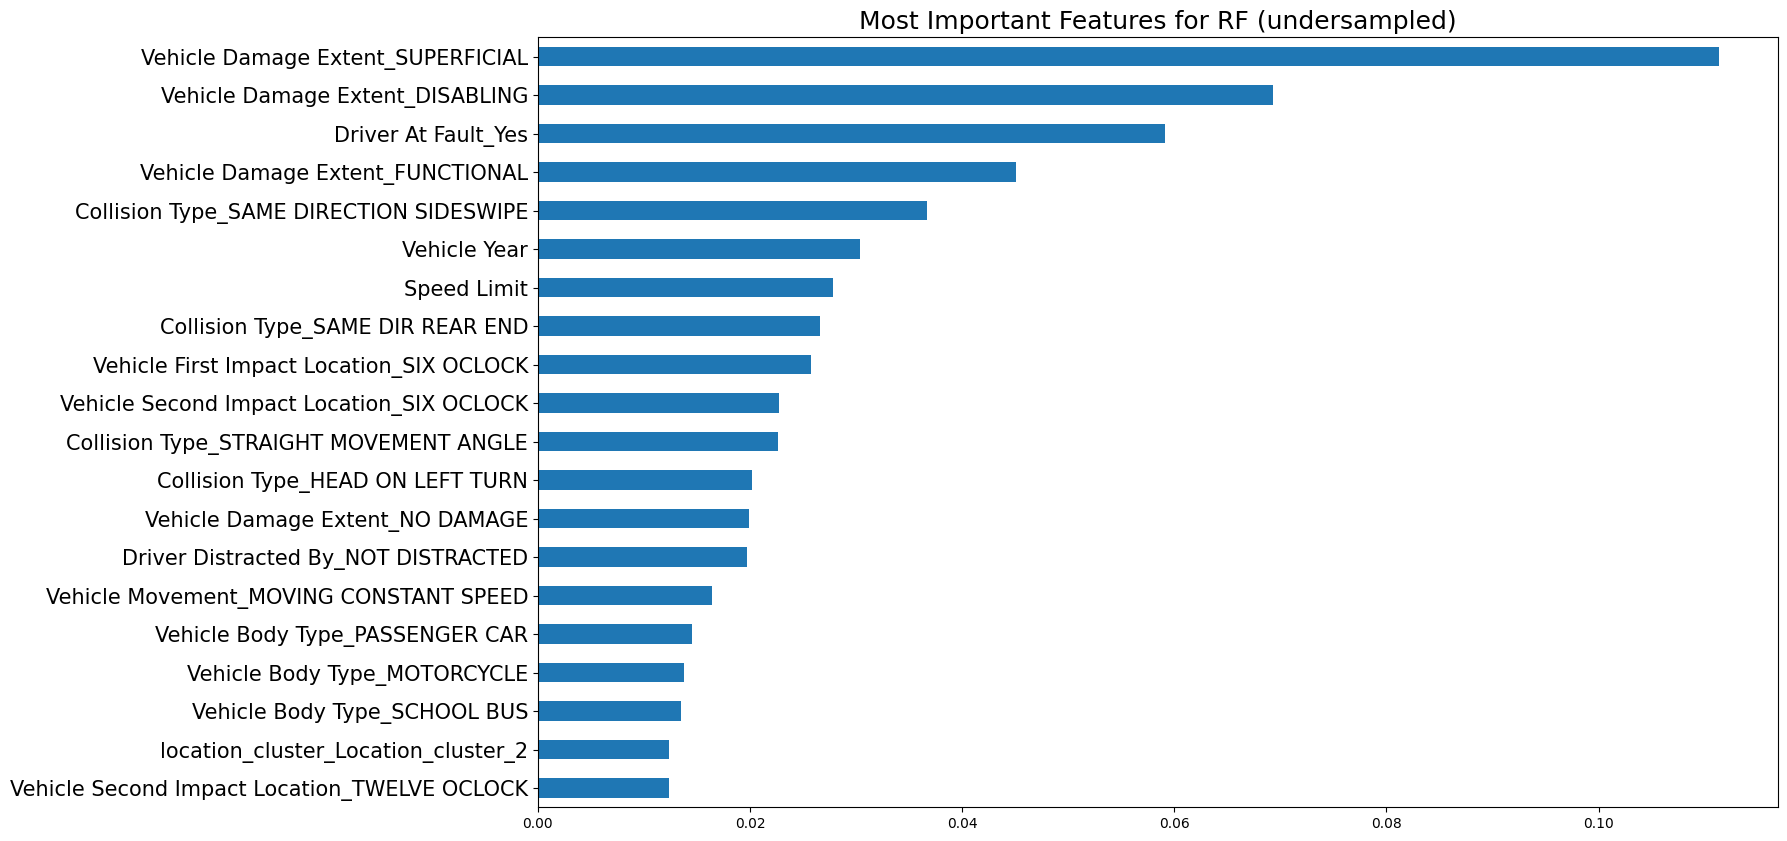

In [68]:
# Plot
feature_importances_us.nlargest(20).plot(kind='barh', figsize=[16,10]).invert_yaxis()
plt.yticks(size=15)
plt.title('Most Important Features for RF (undersampled)', size=18)
plt.show()

In [69]:
# Predictions
rfc_predictions_us = rf_model_us.predict(X_test_us)
print(classification_report(y_test_us, rfc_predictions_us,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.70      0.57      0.63      4167
      Injury       0.64      0.76      0.69      4164

    accuracy                           0.67      8331
   macro avg       0.67      0.67      0.66      8331
weighted avg       0.67      0.67      0.66      8331



In [95]:
# Creating and training the XGBoost model on undersampled data
xgb_model_us = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_us.fit(X_train_us, y_train_us)

# Predictions
xgb_predictions_us = xgb_model_us.predict(X_test_us)
print(classification_report(y_test_us, xgb_predictions_us, target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.69      0.61      0.65      4167
      Injury       0.65      0.73      0.69      4164

    accuracy                           0.67      8331
   macro avg       0.67      0.67      0.67      8331
weighted avg       0.67      0.67      0.67      8331



In [98]:
# Metrics definition
metrics = {
    'Accuracy': accuracy_score,
    'Precision (Macro)': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall (Macro)': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score (Macro)': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
}

# Metric Calculation Functions
def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}

# Calculate metrics
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)

# Comparative Dataframe for organized presentation
comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us
})

comparison_df



,XGBoost,XGBoost (undersampled),Random Forest,Random Forest (undersampled),Logistic Regression,Logistic Regression (undersampled)
Accuracy,0.639390,0.671348,0.584753,0.666547,0.621359,0.665826
Precision (Macro),0.611538,0.673759,0.596080,0.672481,0.605340,0.666099
Recall (Macro),0.668883,0.671369,0.646687,0.666580,0.660559,0.665834
F1 Score (Macro),0.591221,0.670221,0.550764,0.663681,0.577597,0.665695


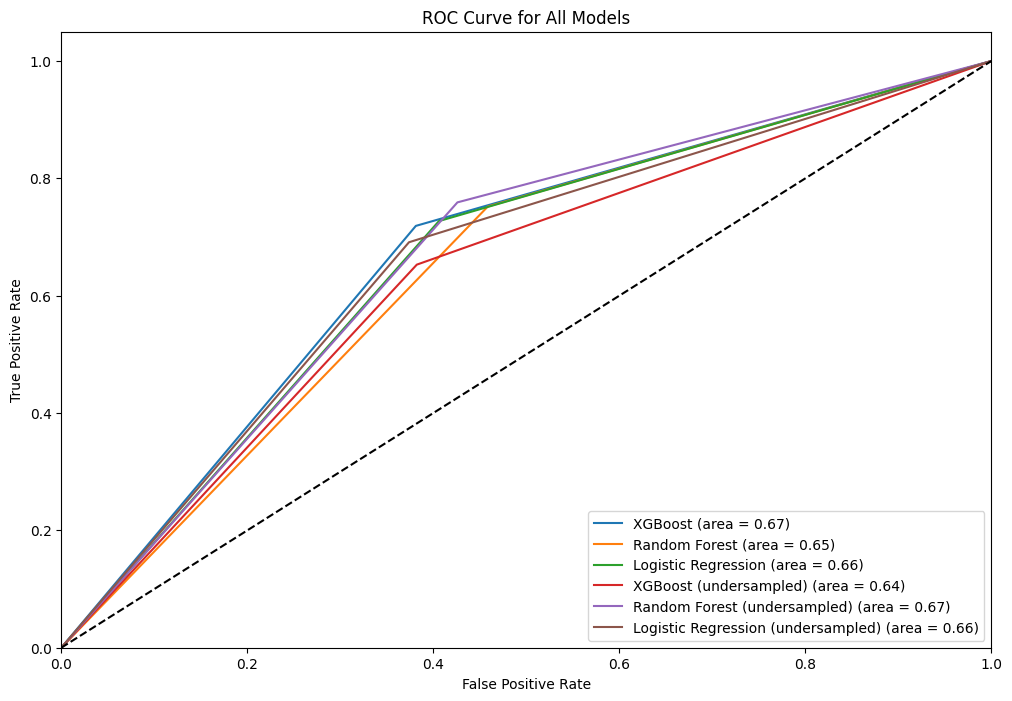

In [72]:
# ROC Curve calculations
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_predictions)
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, rfc_predictions)
fpr_log, tpr_log, _ = roc_curve(y_test, log_pred)
fpr_xgb_us, tpr_xgb_us, _ = roc_curve(y_test_us, xgb_predictions_us)
fpr_rfc_us, tpr_rfc_us, _ = roc_curve(y_test_us, rfc_predictions_us)
fpr_log_us, tpr_log_us, _ = roc_curve(y_test_us, log_pred_us)

# Plot
plt.figure(figsize=(12, 8))

# Original models
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (area = {auc(fpr_xgb, tpr_xgb):.2f})')
plt.plot(fpr_rfc, tpr_rfc, label=f'Random Forest (area = {auc(fpr_rfc, tpr_rfc):.2f})')
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (area = {auc(fpr_log, tpr_log):.2f})')

# Undersampled models
plt.plot(fpr_xgb_us, tpr_xgb_us, label=f'XGBoost (undersampled) (area = {auc(fpr_xgb_us, tpr_xgb_us):.2f})')
plt.plot(fpr_rfc_us, tpr_rfc_us, label=f'Random Forest (undersampled) (area = {auc(fpr_rfc_us, tpr_rfc_us):.2f})')
plt.plot(fpr_log_us, tpr_log_us, label=f'Logistic Regression (undersampled) (area = {auc(fpr_log_us, tpr_log_us):.2f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for All Models')
plt.legend(loc="lower right")
plt.show()


In [97]:
rf_parameters = {
    'n_estimators': [50,100, 200, 300, 400,450,500,700,1000,1500,2000,2500,3000,3500,4000,4500,5000],
    'max_depth': [3, 5, 7, 9,11,13,15,17,19,21,23,25,27,29,31,33,35],
    'learning_rate': [0.01, 0.05, 0.1, 0.15, 0.2],
    'max_bin':[50,100,200,300,400,500,600,700,800,900,1000]
}

rfr = XGBClassifier(random_state=42,tree_method='hist',alpha=0.3)
rf_grid_search = RandomizedSearchCV(rfr, rf_parameters, cv=5, scoring='precision', n_jobs=-1, verbose=1)
rf_grid_search.fit(X_train_us, y_train_us)

# Best RF Model
best_rf = rf_grid_search.best_estimator_

# RF predictions
rf_preds = best_rf.predict(X_test_us)

print(classification_report(y_test_us, rf_preds))
print(f'Best parameters: {rf_grid_search.best_params_}')

Fitting 5 folds for each of 10 candidates, totalling 50 fits


              precision    recall  f1-score   support

           0       0.69      0.63      0.66      4167
           1       0.66      0.72      0.69      4164

    accuracy                           0.67      8331
   macro avg       0.68      0.67      0.67      8331
weighted avg       0.68      0.67      0.67      8331

Best parameters: {'n_estimators': 500, 'max_depth': 3, 'max_bin': 50, 'learning_rate': 0.2}


In [100]:
# oversample minority class in df and perform all modelling steps again
df_majority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=42)
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority_upsampled, df_majority])
df_upsampled = df_upsampled.sample(frac=1, random_state=42).reset_index(drop=True)
df_upsampled['Injury Severity'].value_counts()


Injury Severity
1    48551
0    48551
Name: count, dtype: int64

/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/Abdul/opt/anaconda3/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


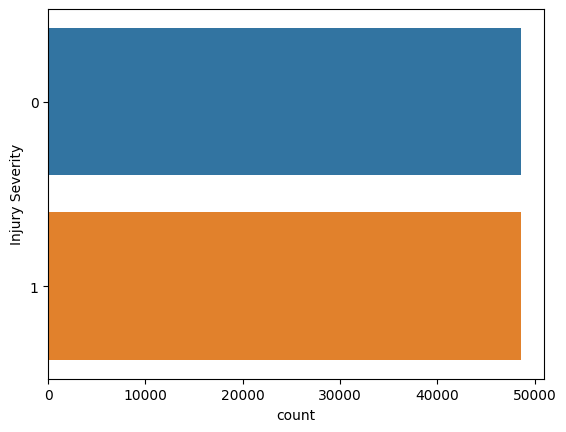

In [101]:
sns.countplot(y=df_upsampled['Injury Severity']);

In [102]:
X3 = df_upsampled.drop("Injury Severity", axis=1)
y3 = df_upsampled["Injury Severity"]
X_train_os, X_test_os, y_train_os, y_test_os = train_test_split(X3, y3, test_size=0.33, random_state=42)


In [103]:
logreg_os = LogisticRegression(max_iter=10000)
logreg_os.fit(X_train_os, y_train_os)
log_pred_os = logreg_os.predict(X_test_os)
print(classification_report(y_test_os, log_pred_os,target_names=['No Injury','Injury']))


              precision    recall  f1-score   support

   No Injury       0.68      0.65      0.67     15991
      Injury       0.67      0.70      0.68     16053

    accuracy                           0.67     32044
   macro avg       0.67      0.67      0.67     32044
weighted avg       0.67      0.67      0.67     32044



In [104]:
coef = pd.DataFrame(logreg_os.coef_.T, index=X_train_os.columns, columns=['coef'])
coef['abs_coef'] = coef.coef.abs()
coef = coef.sort_values('abs_coef', ascending=False)
coef.drop('abs_coef', axis=1, inplace=True)
coef.head(30)   


,coef
Vehicle Damage Extent_SUPERFICIAL,-2.410577
Vehicle Damage Extent_NO DAMAGE,-1.959768
Vehicle Damage Extent_FUNCTIONAL,-1.888263
Vehicle Body Type_MOTORCYCLE,1.471218
Vehicle Damage Extent_DISABLING,-1.047006
Collision Type_HEAD ON,0.969265
Vehicle Body Type_SCHOOL BUS,-0.957263
Vehicle Body Type_TRANSIT BUS,-0.823414
Collision Type_SAME DIRECTION SIDESWIPE,-0.810212
Vehicle Body Type_PICKUP TRUCK,-0.595046


In [105]:
rf_model_os = RandomForestClassifier(n_estimators=450, random_state=42, max_depth=11)
rf_model_os.fit(X_train_os, y_train_os)
rfc_predictions_os = rf_model_os.predict(X_test_os)
print(classification_report(y_test_os, rfc_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.75      0.58      0.66     15991
      Injury       0.66      0.81      0.73     16053

    accuracy                           0.70     32044
   macro avg       0.71      0.70      0.69     32044
weighted avg       0.71      0.70      0.69     32044



In [109]:
xgb_model_os = XGBClassifier(n_estimators=200, random_state=42, max_depth=5,tree_method='hist',max_bin=800,alpha=0.3,learning_rate=0.15)
xgb_model_os.fit(X_train_os, y_train_os)
xgb_predictions_os = xgb_model_os.predict(X_test_os)
print(classification_report(y_test_os, xgb_predictions_os,target_names=['No Injury', 'Injury']))

              precision    recall  f1-score   support

   No Injury       0.74      0.63      0.68     15991
      Injury       0.68      0.78      0.73     16053

    accuracy                           0.71     32044
   macro avg       0.71      0.71      0.71     32044
weighted avg       0.71      0.71      0.71     32044



In [107]:
# compare metrics of all nine models in a clean dataframe
metrics = {
    'Accuracy': accuracy_score,
    'Precision (Macro)': lambda y_true, y_pred: precision_score(y_true, y_pred, average='macro'),
    'Recall (Macro)': lambda y_true, y_pred: recall_score(y_true, y_pred, average='macro'),
    'F1 Score (Macro)': lambda y_true, y_pred: f1_score(y_true, y_pred, average='macro'),
}

def calculate_metrics(y_true, y_pred):
    return {metric_name: metric_func(y_true, y_pred) for metric_name, metric_func in metrics.items()}
xgb_metrics = calculate_metrics(y_test, xgb_predictions)
rfc_metrics = calculate_metrics(y_test, rfc_predictions)
log_metrics = calculate_metrics(y_test, log_pred)
xgb_metrics_us = calculate_metrics(y_test_us, xgb_predictions_us)
rfc_metrics_us = calculate_metrics(y_test_us, rfc_predictions_us)
log_metrics_us = calculate_metrics(y_test_us, log_pred_us)
xgb_metrics_os = calculate_metrics(y_test_os, xgb_predictions_os)
rfc_metrics_os = calculate_metrics(y_test_os, rfc_predictions_os)
log_metrics_os = calculate_metrics(y_test_os, log_pred_os)

comparison_df = pd.DataFrame({
    'XGBoost': xgb_metrics,
    'XGBoost (undersampled)': xgb_metrics_us,
    'XGBoost (oversampled)': xgb_metrics_os,
    'Random Forest': rfc_metrics,
    'Random Forest (undersampled)': rfc_metrics_us,
    'Random Forest (oversampled)': rfc_metrics_os,
    'Logistic Regression': log_metrics,
    'Logistic Regression (undersampled)': log_metrics_us,
    'Logistic Regression (oversampled)': log_metrics_os
})

comparison_df

,XGBoost,XGBoost (undersampled),XGBoost (oversampled),Random Forest,Random Forest (undersampled),Random Forest (oversampled),Logistic Regression,Logistic Regression (undersampled),Logistic Regression (oversampled)
Accuracy,0.639390,0.671348,0.707902,0.584753,0.666547,0.696854,0.621359,0.665826,0.673574
Precision (Macro),0.611538,0.673759,0.712562,0.596080,0.672481,0.707208,0.605340,0.666099,0.673946
Recall (Macro),0.668883,0.671369,0.707757,0.646687,0.666580,0.696637,0.660559,0.665834,0.673527
F1 Score (Macro),0.591221,0.670221,0.706198,0.550764,0.663681,0.692869,0.577597,0.665695,0.673361


In [119]:
#print xgb feature importance
feature_importances = pd.DataFrame(xgb_model_os.feature_importances_, index = X_train_os.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Vehicle First Impact Location_SIX OCLOCK,0.067904
Vehicle Damage Extent_SUPERFICIAL,0.059174
Vehicle Damage Extent_NO DAMAGE,0.046618
Driver At Fault_Yes,0.044570
Vehicle Damage Extent_FUNCTIONAL,0.039000
...,...
Driver Distracted By_SMOKING RELATED,0.000000
Vehicle Movement_DRIVERLESS MOVING VEH.,0.000000
Traffic Control_WARNING SIGN,0.000000
Surface Condition_WATER(STANDING/MOVING),0.000000
